In [49]:
import os
from os import path
import shutil
import pandas as pd
from matplotlib import pyplot as plt

Fetching all the trace files and storing them in four variables. Two Variables include trace files of Simulation for Backlash (Forward movement) and PTP comparator (Reverse movement), while the other two variables include trace files of Real robot.

In [50]:
# Fetch all regular motion files
target_path_1 = '../Traces_Real/Backlash'
target_path_2 = '../Traces_Real/PTP_Aut_Backlash_Comparator'

target_path_3 = '../Traces_Simulation/PTP_Backlash_Comp_sim'
target_path_4 = '../Traces_Simulation/Backlash_Sim'
root_path = './'
fileNames_1 = os.listdir(target_path_1)
fileNames_2 = os.listdir(target_path_2)

fileNames_3 = os.listdir(target_path_3)
fileNames_4 = os.listdir(target_path_4)

fileNames_Backlash = [file for file in fileNames_1 if 'KRCIpo.csv' in file]
fileNames_Comparator_Real = [file for file in fileNames_2 if 'KRCIpo.csv' in file]
fileNames_Comparator_Sim = [file for file in fileNames_3 if 'KRCIpo.csv' in file]
fileNames_Backlash_Sim = [file for file in fileNames_4 if 'KRCIpo.csv' in file]

for file in fileNames_Backlash:
    shutil.copy(path.join(target_path_1, file), root_path)

for file in fileNames_Comparator_Real:
    shutil.copy(path.join(target_path_2, file), root_path)

for file in fileNames_Comparator_Sim:
    shutil.copy(path.join(target_path_3, file), root_path)

for file in fileNames_Backlash_Sim:
    shutil.copy(path.join(target_path_4, file), root_path)


Axis position plots of Real robot for Backlash (Forward) and comparator (Reverse)

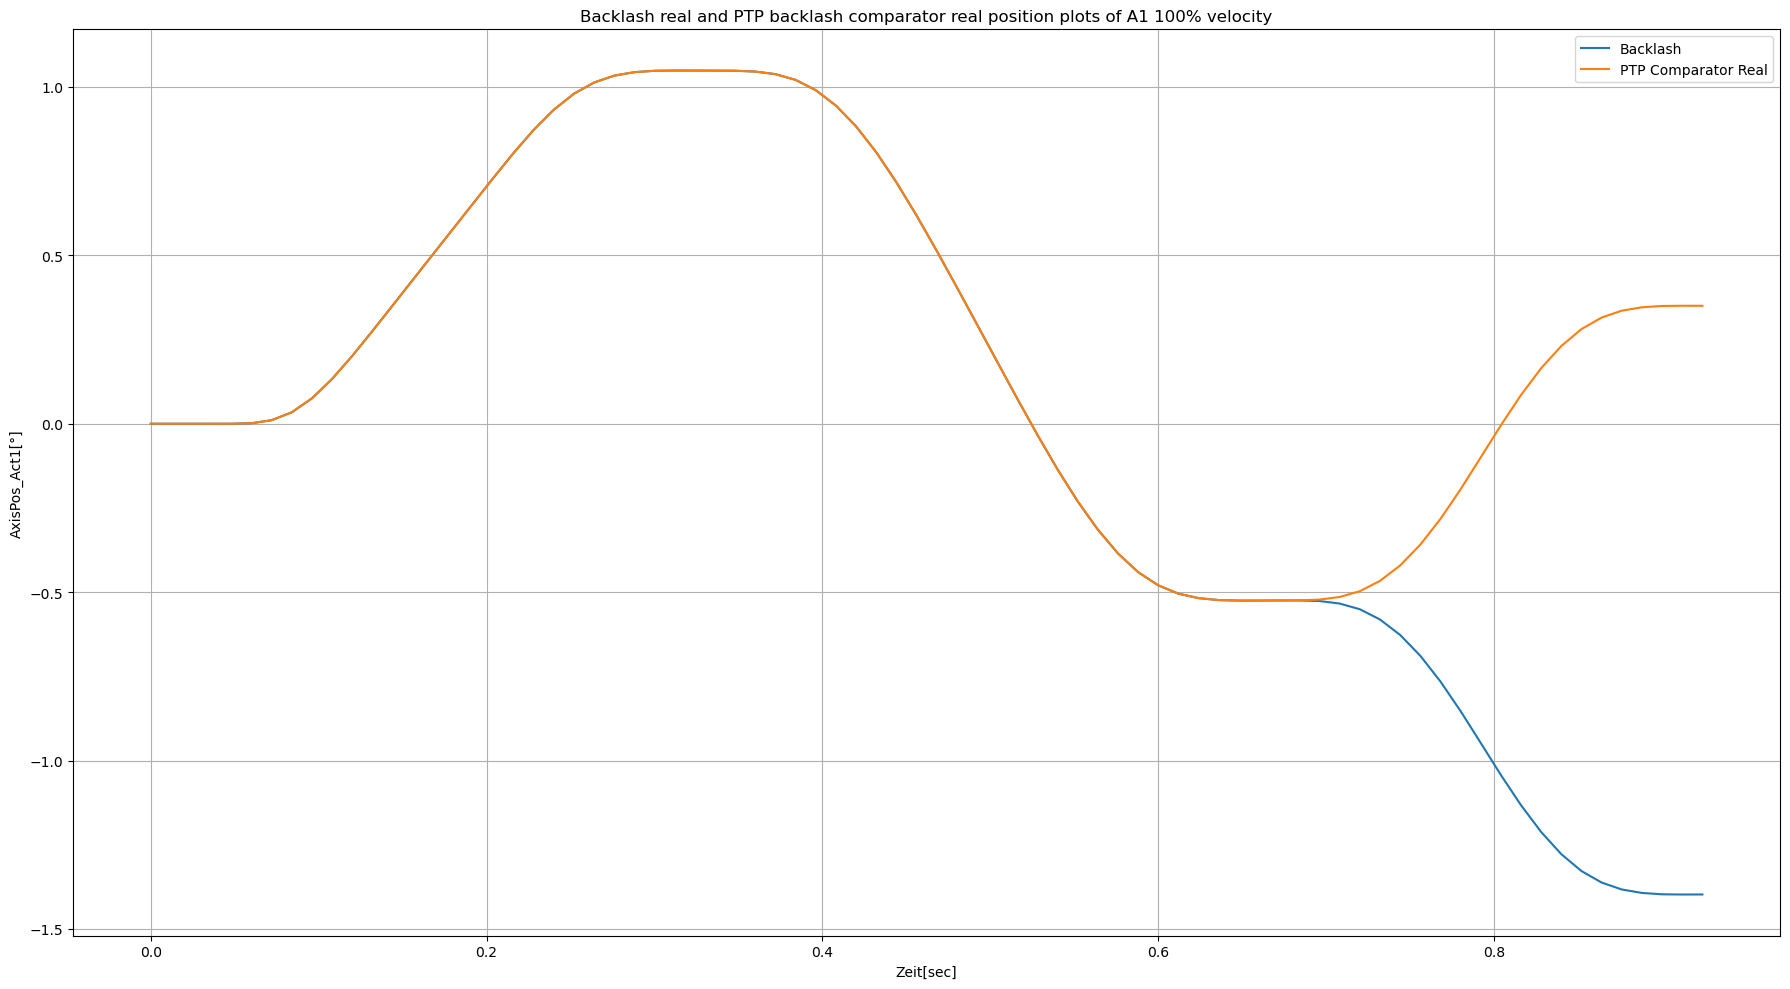

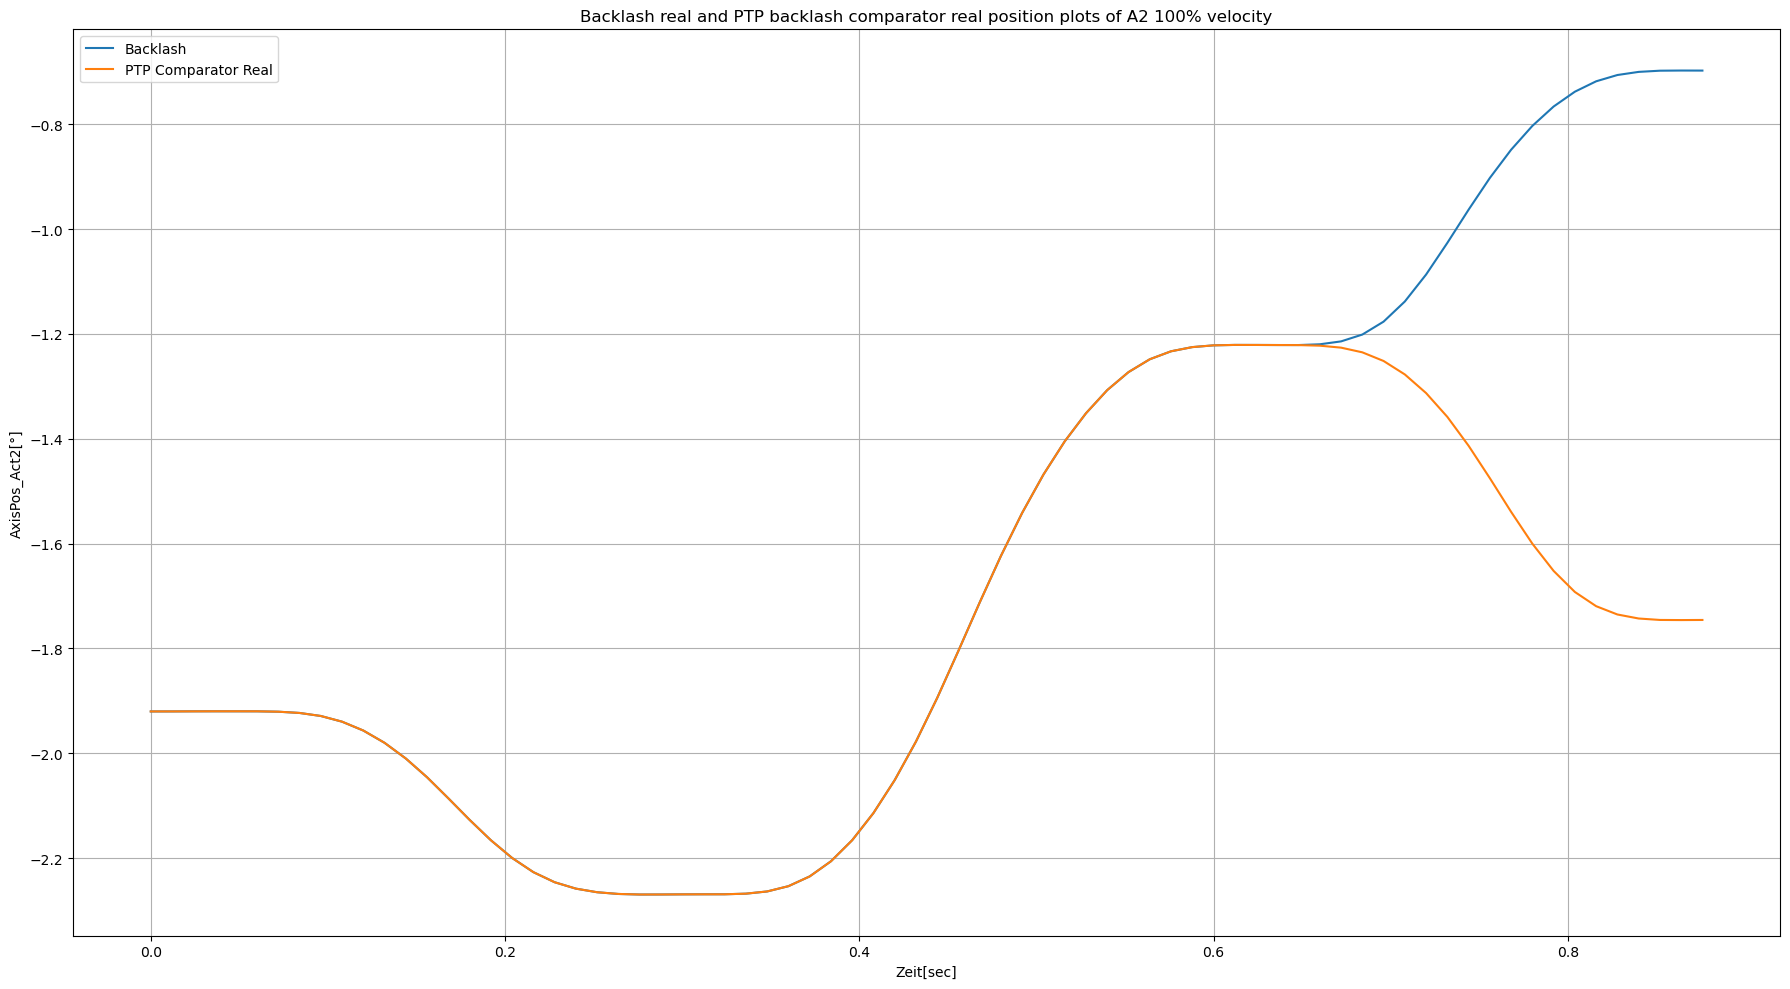

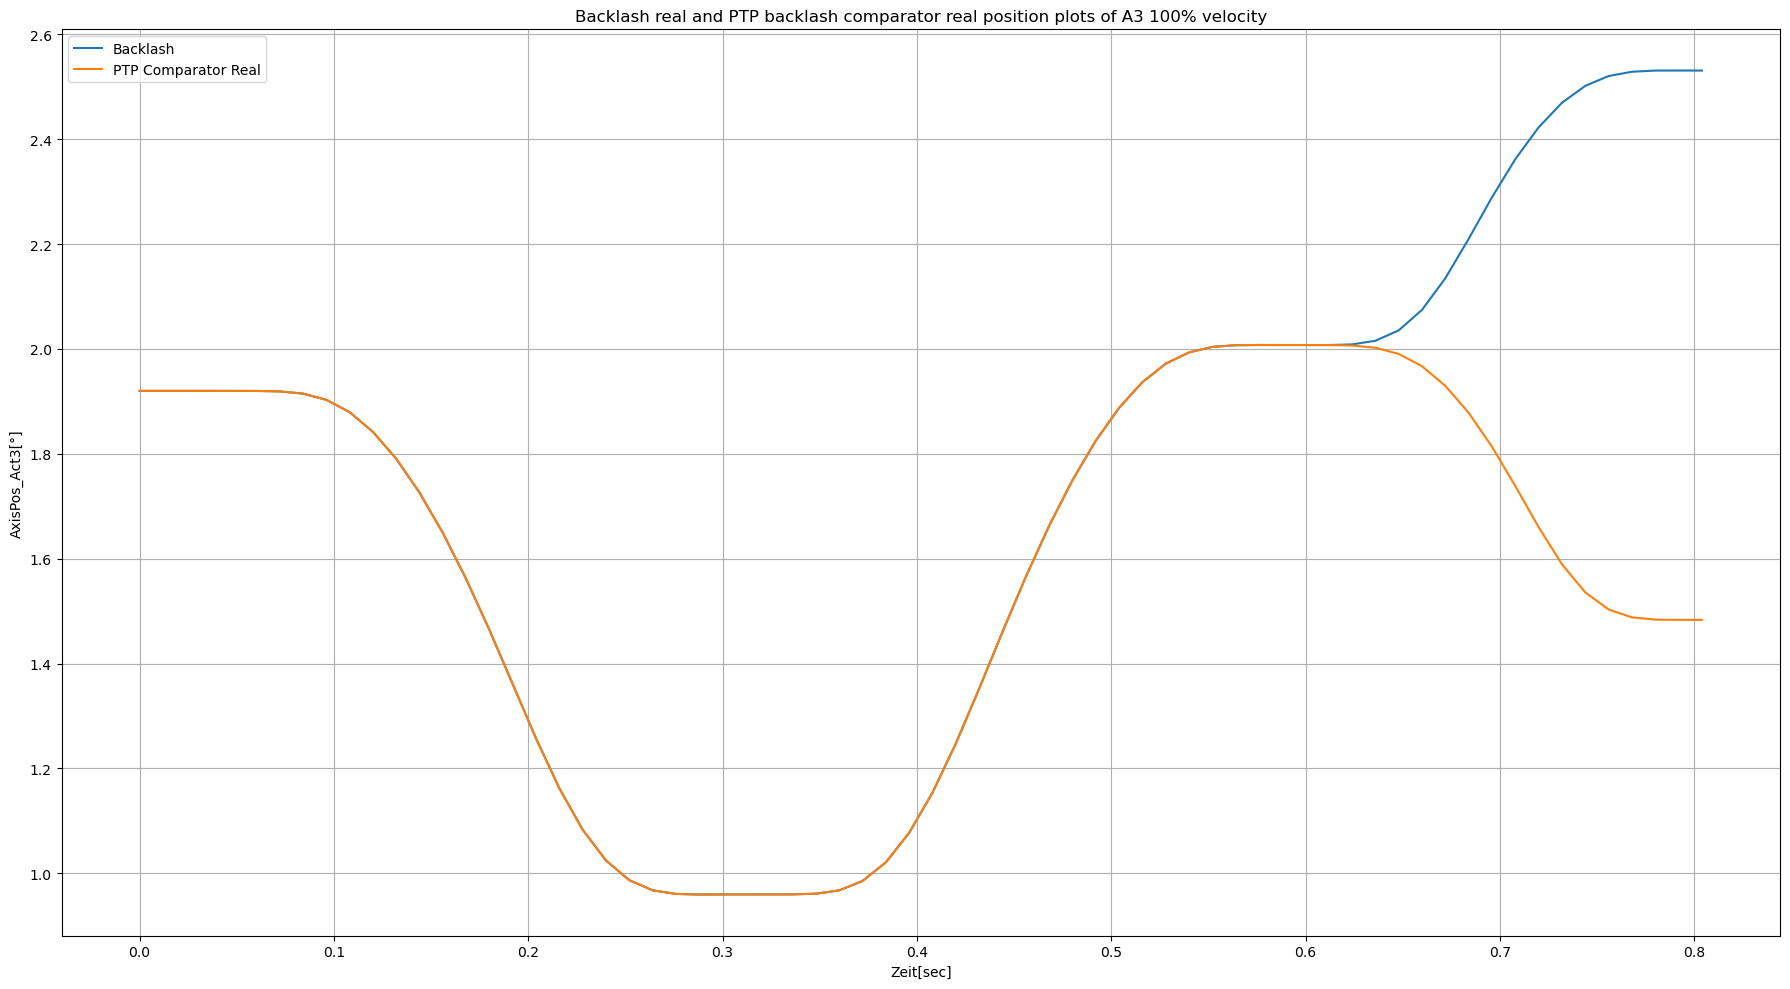

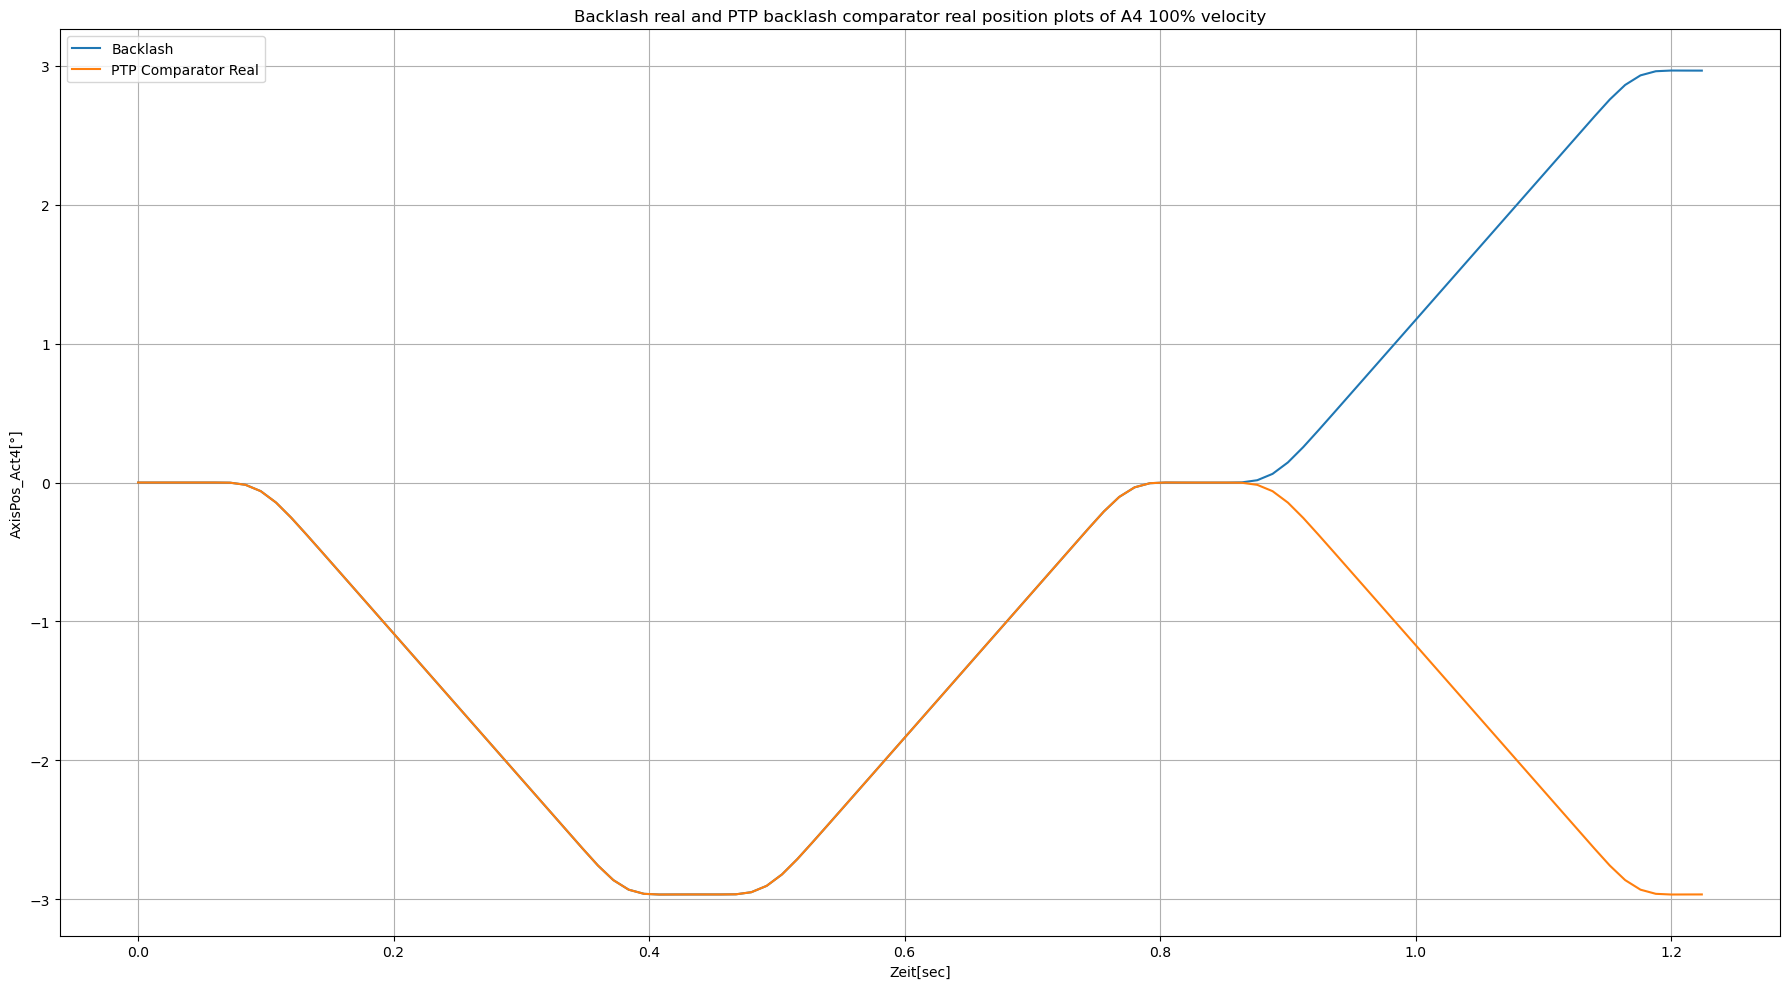

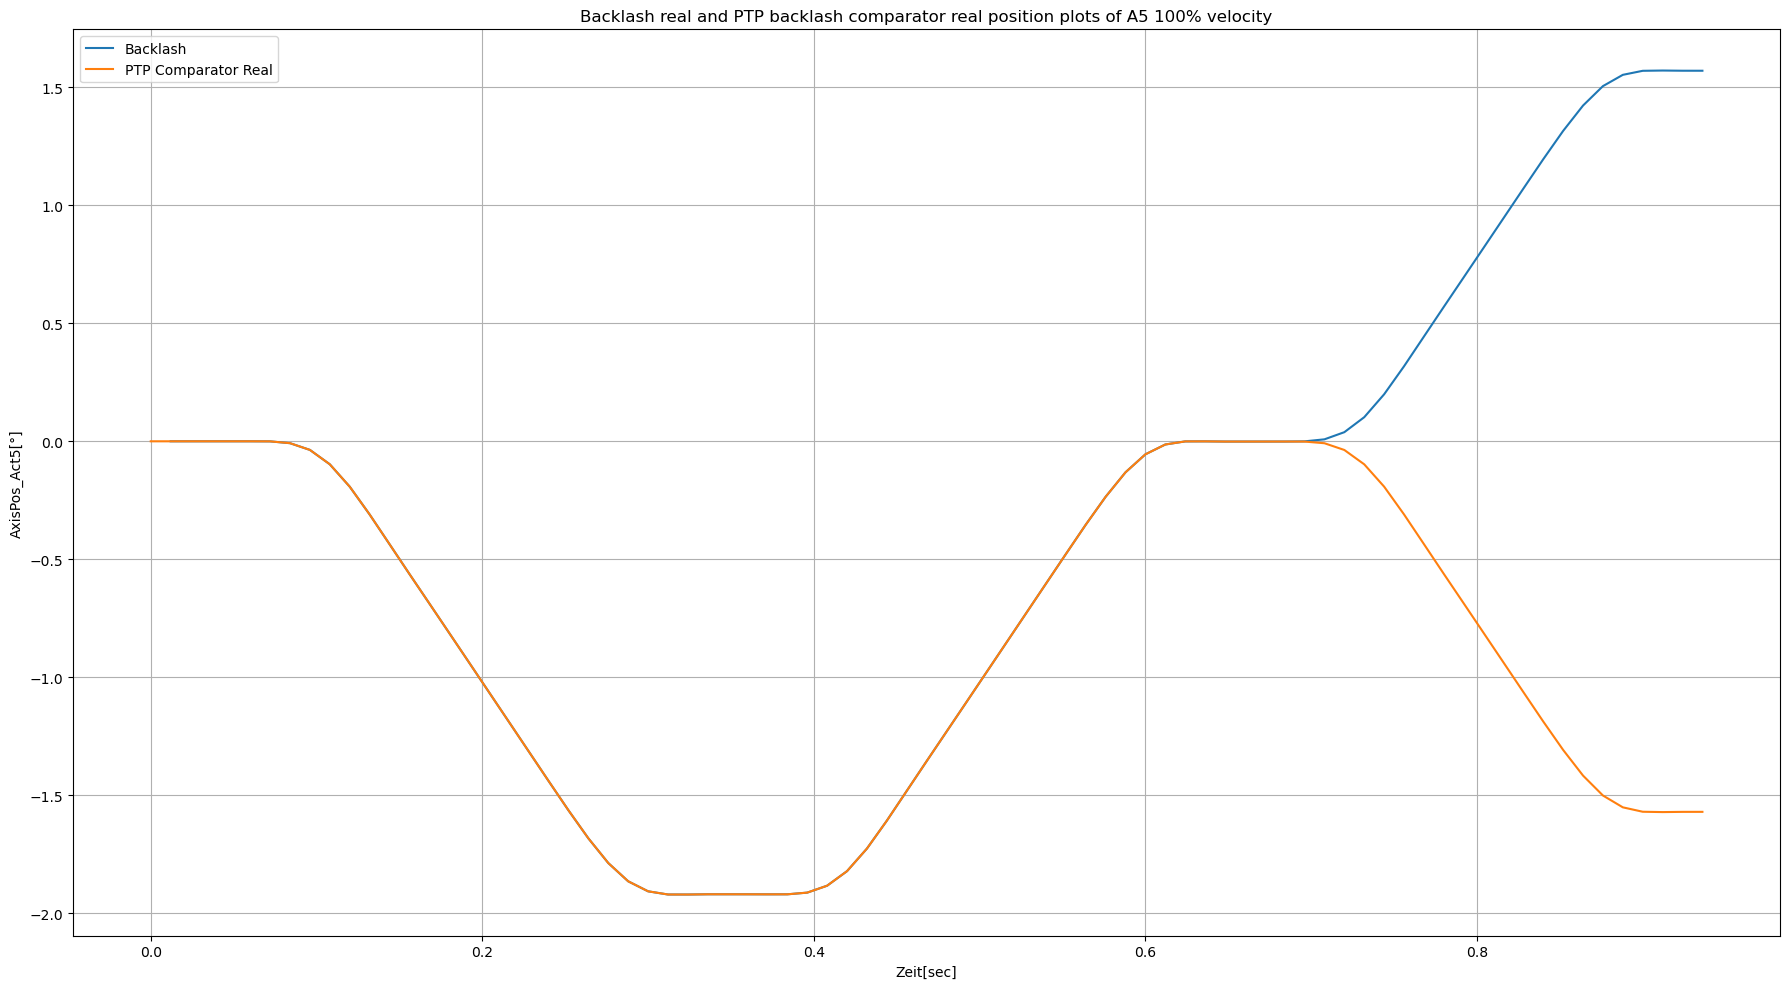

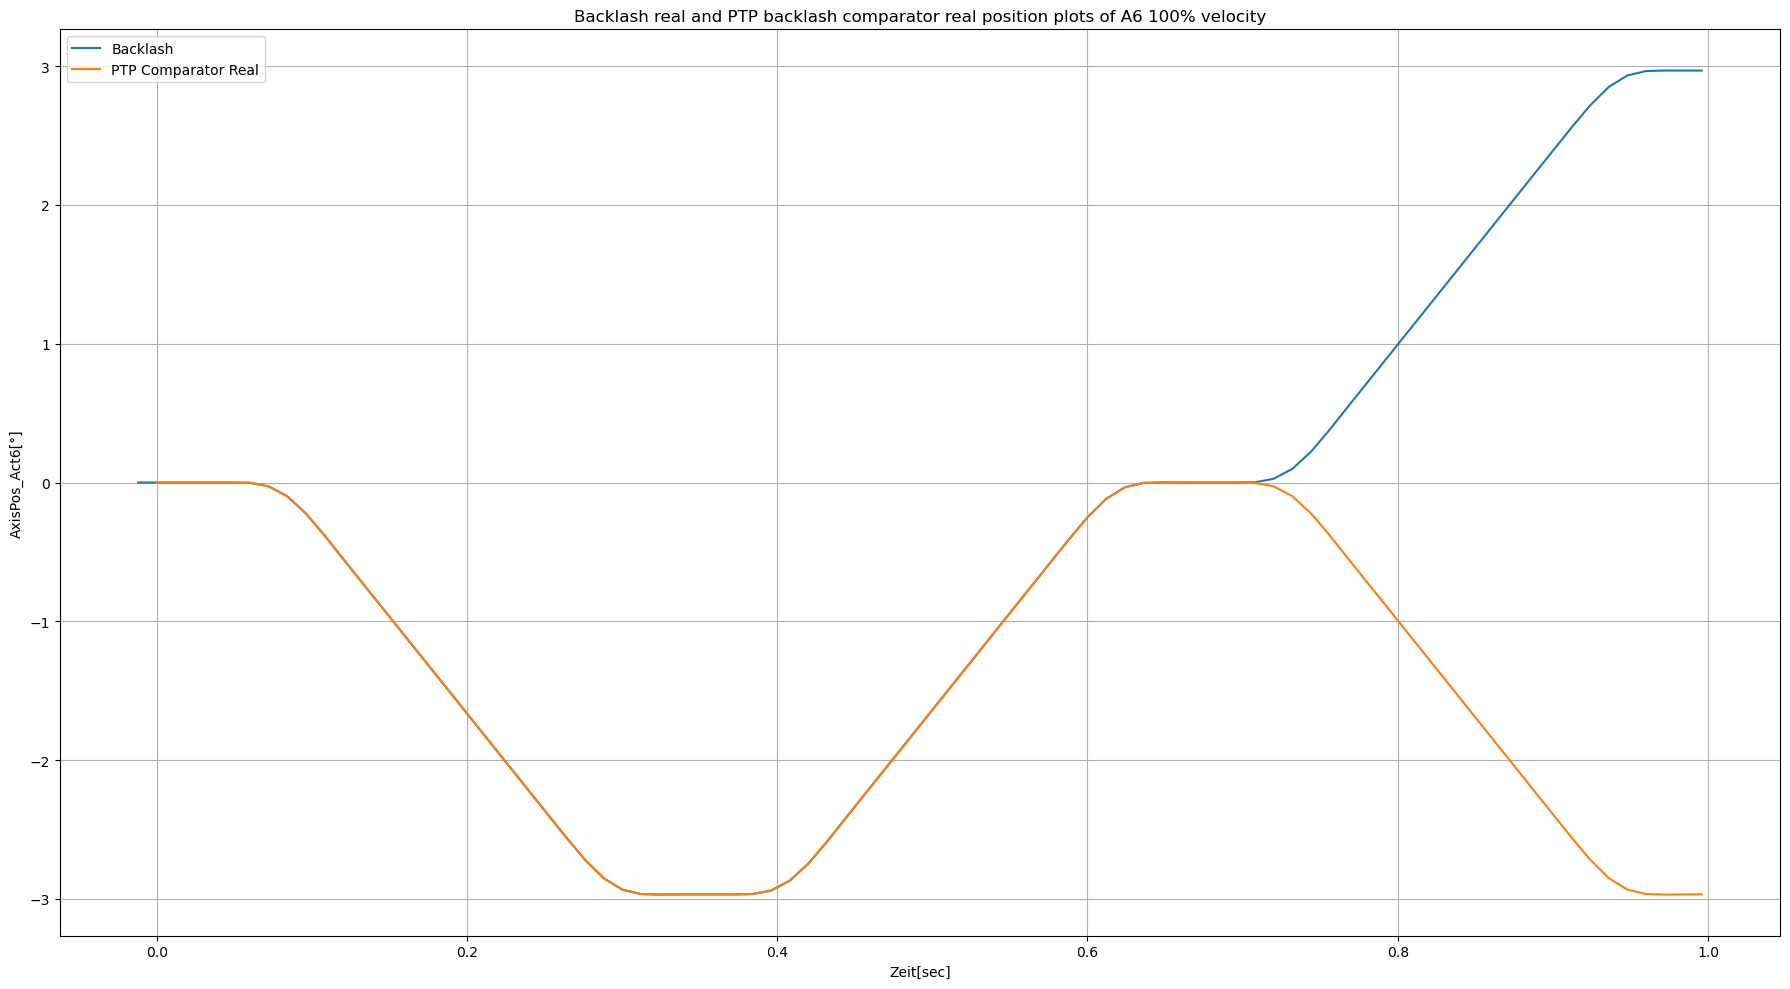

In [51]:
li_Backlash = []
li_Comparator_Real = []

if (len(fileNames_Backlash)==len(fileNames_Comparator_Real)):
    for i in range (len(fileNames_Backlash)):
        df_Backlash = pd.read_csv(fileNames_Backlash[i], delimiter=';', encoding='cp1252')
        df_Comparator_Real = pd.read_csv(fileNames_Comparator_Real[i], delimiter=';', encoding='cp1252')  

        li_Backlash.append(df_Backlash)
        li_Comparator_Real.append(df_Comparator_Real)

        pos_col_Backlash = li_Backlash[i].columns[i+7]
        pos_col_Comparator_Real = li_Comparator_Real[i].columns[i+7]

        # Function for time shifting and plotting the trace of backlash real
        def shift_Backlash(shift):
            time_Shift = li_Backlash[i]['Zeit[sec]'] + shift        #Shifting the trace of Backlash (forward) real to right
            li_Backlash[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Backlash[i]['Zeit[sec]'], li_Backlash[i][pos_col_Backlash], label = 'Backlash')
            time_Shift = li_Backlash[i]['Zeit[sec]'] - shift        #Shifting the trace back to original position for next iteration
            li_Backlash[i]['Zeit[sec]'] = time_Shift

        ##########################################################################################################################
        # Backlash real and PTP comparator real plots    
        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==4):
            shift_Backlash(0.012)

        elif (i==5):
            shift_Backlash(-0.012)

        else:
            shift_Backlash(0)

        plt.plot(li_Comparator_Real[i]['Zeit[sec]'], li_Comparator_Real[i][pos_col_Comparator_Real], label = 'PTP Comparator Real')
        plt.legend()
        plt.grid()
        plt.xlabel(li_Comparator_Real[i].columns[0])
        plt.ylabel(li_Comparator_Real[i].columns[i+7])
        plt.title('Backlash real and PTP backlash comparator real position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Backlash_Comparator_Real'):
            os.makedirs('Images/Backlash_Comparator_Real')
        plt.savefig('Images/Backlash_Comparator_Real/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

Axis position plots of Simulation for Backlash (Forward) and comparator (Reverse)

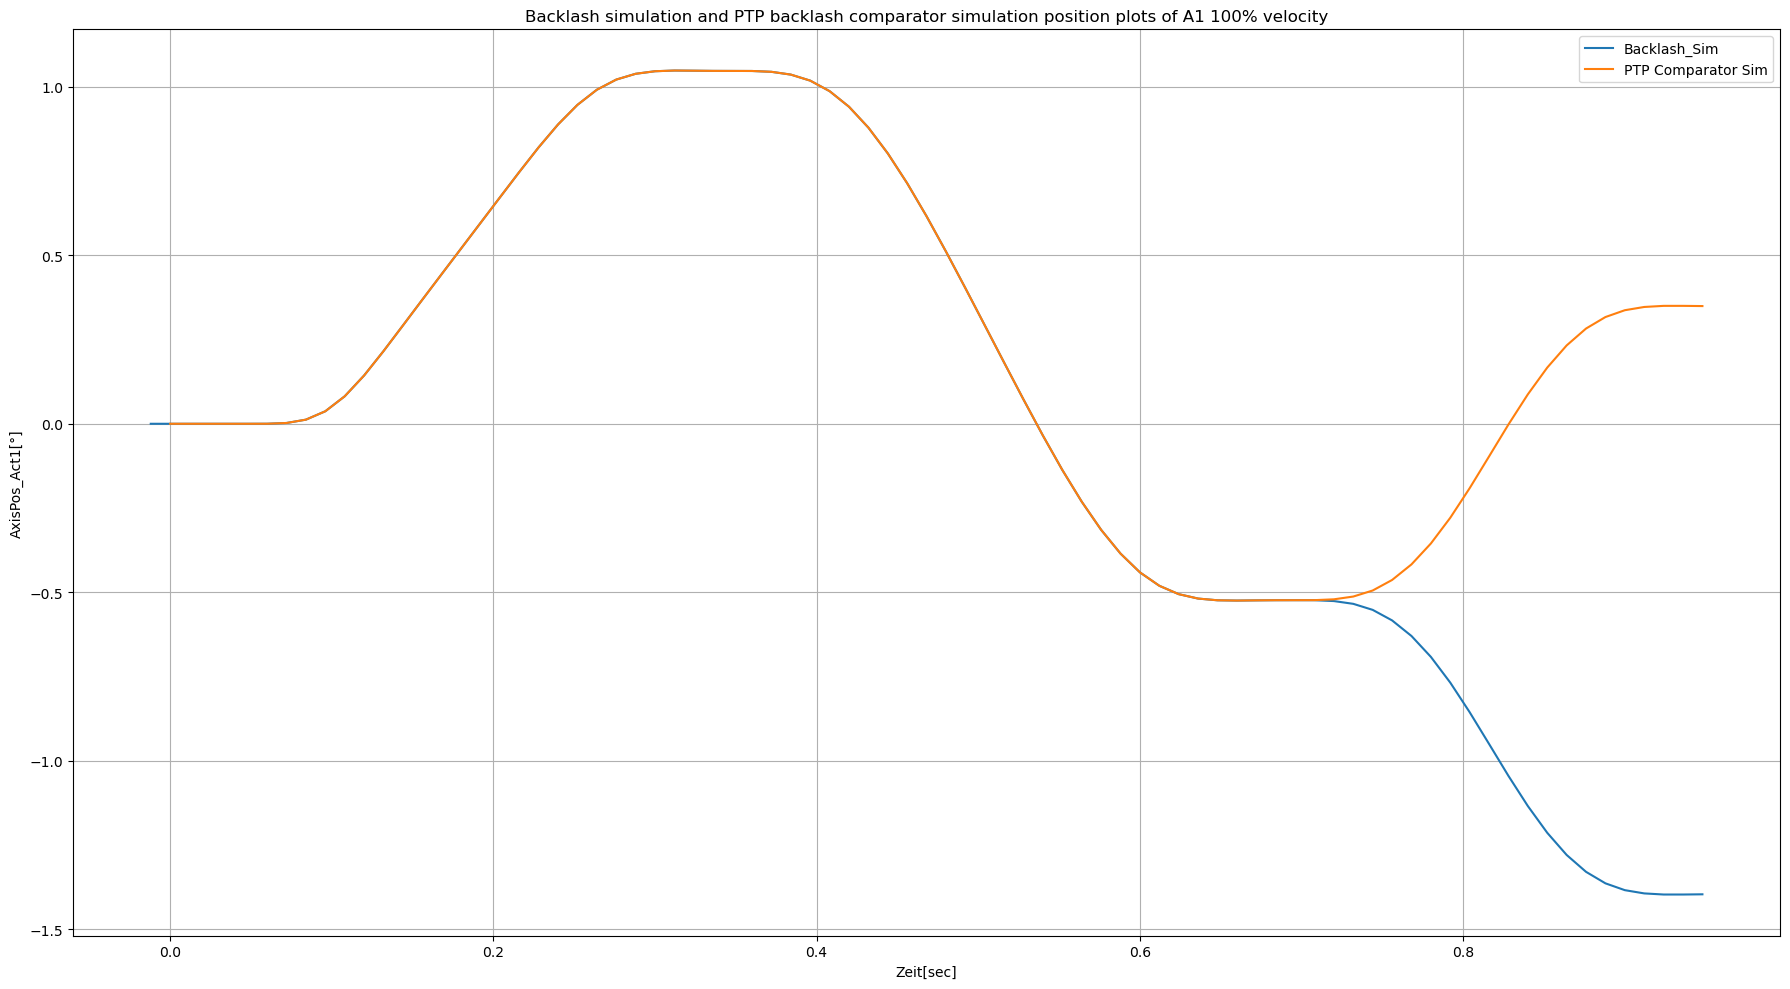

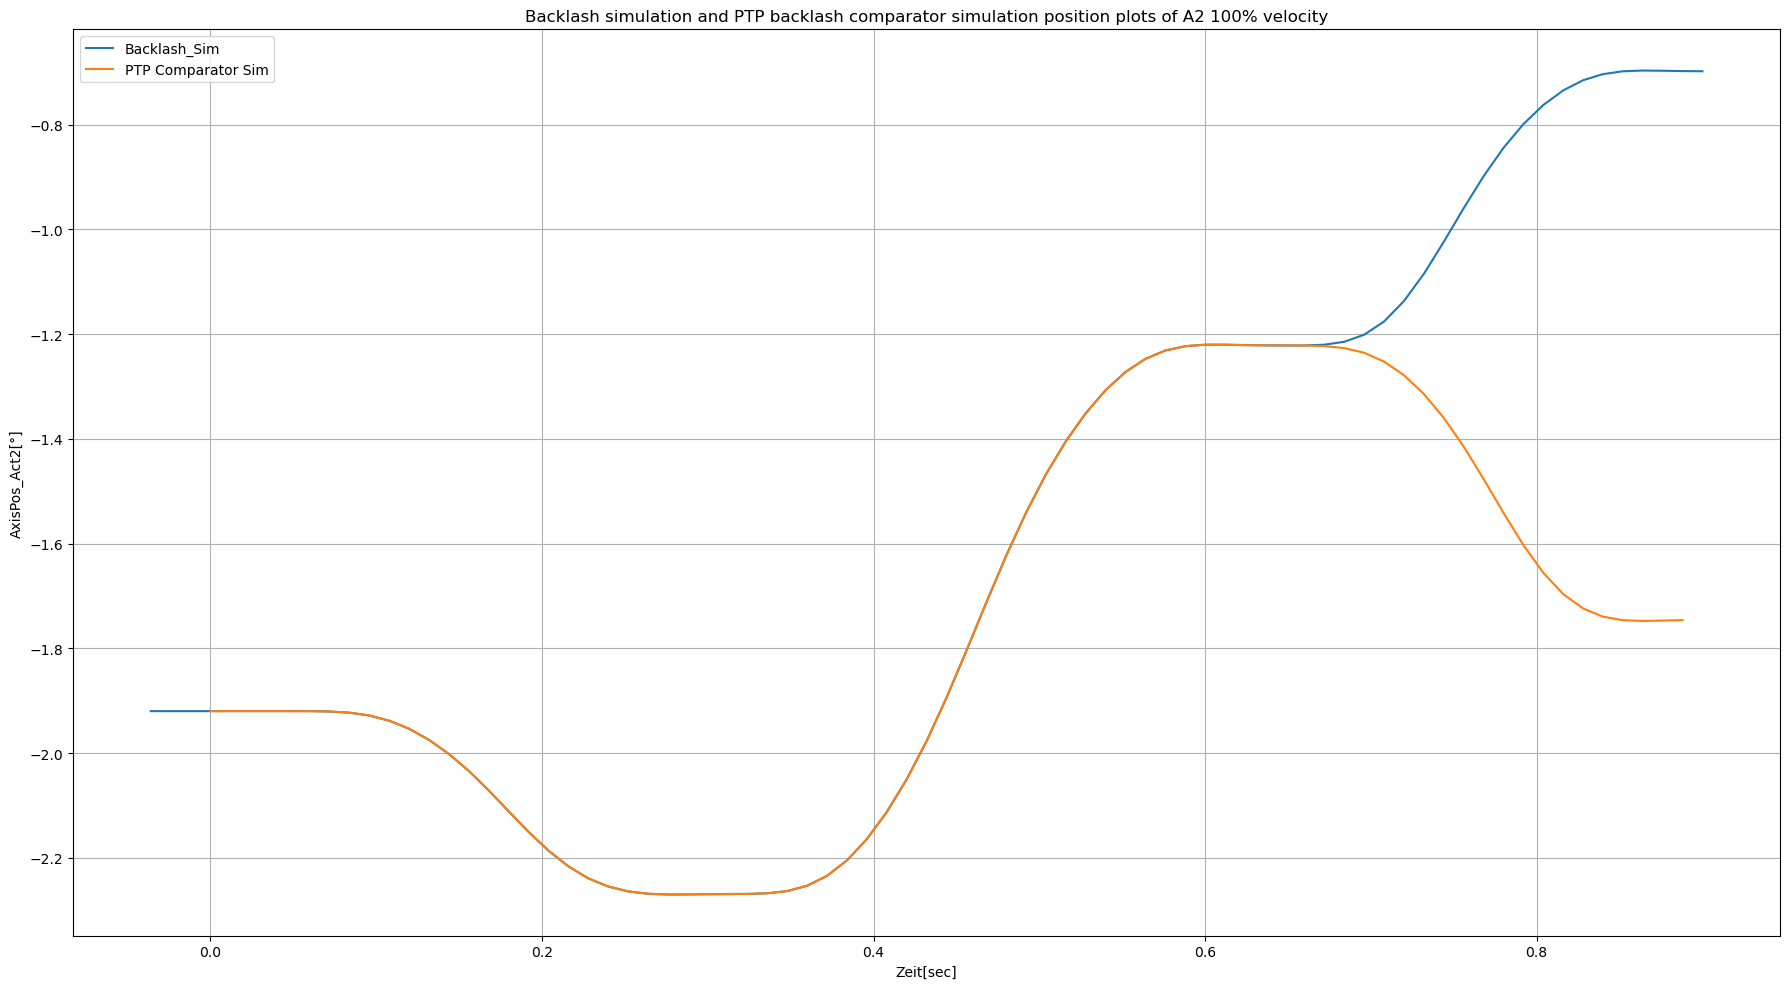

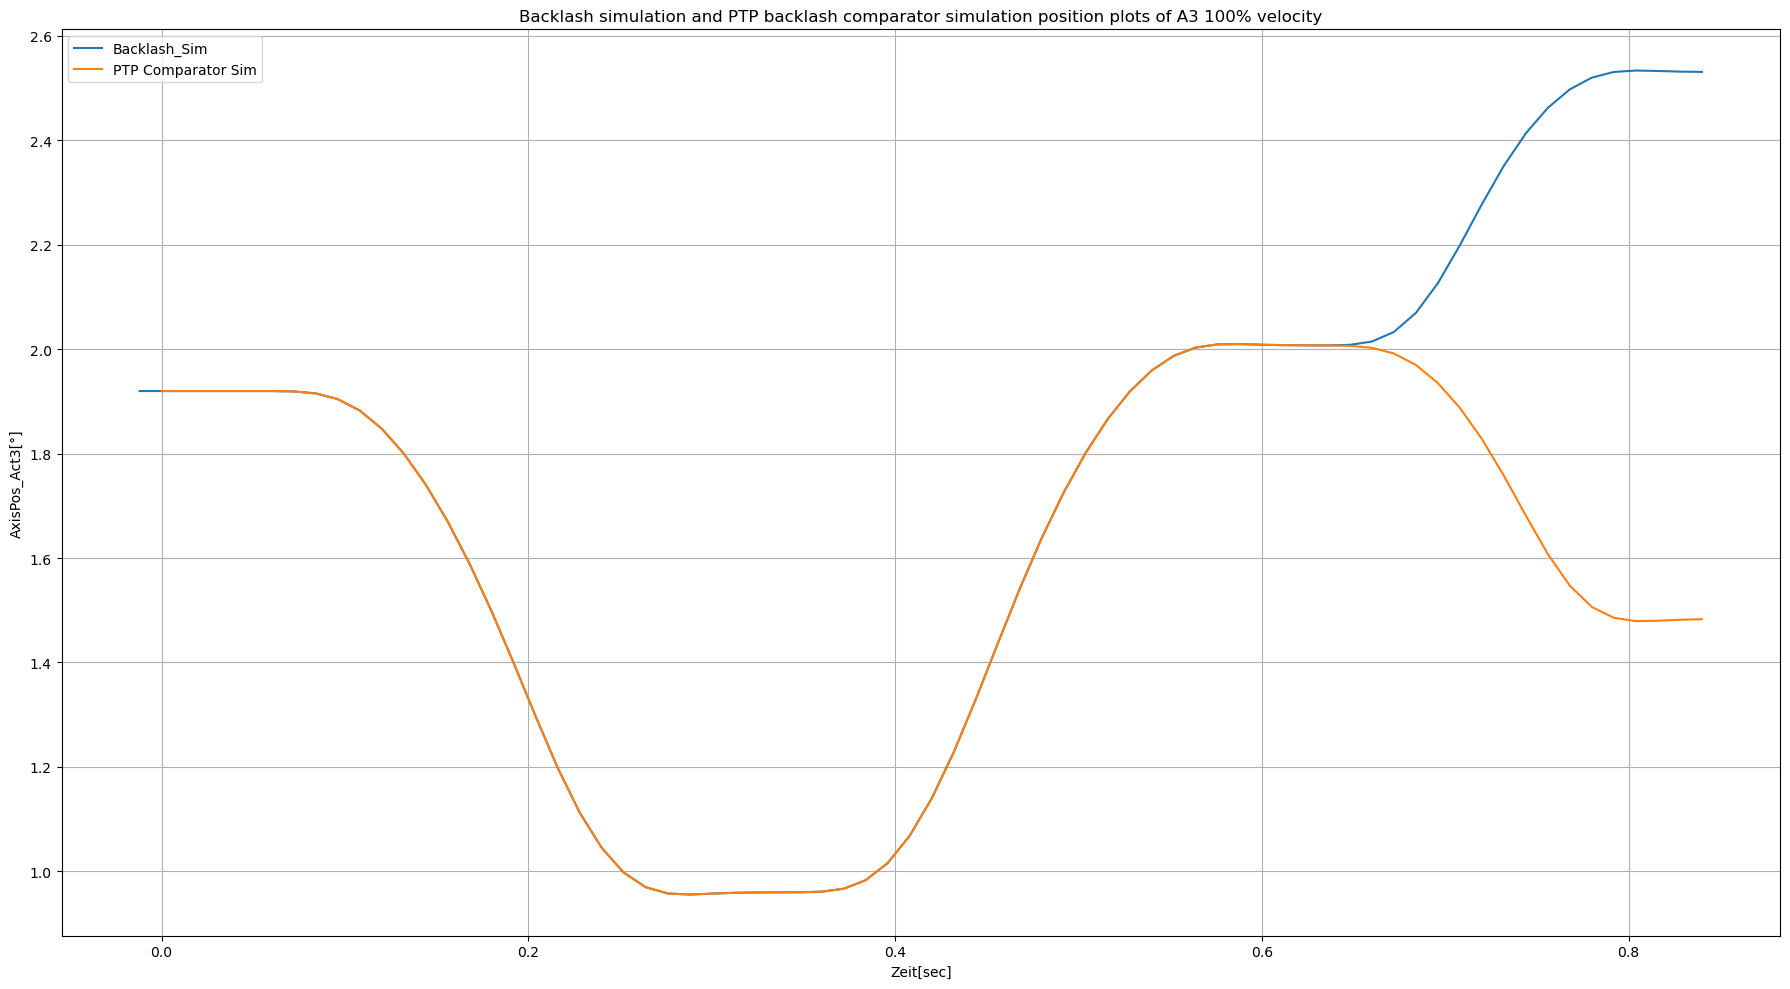

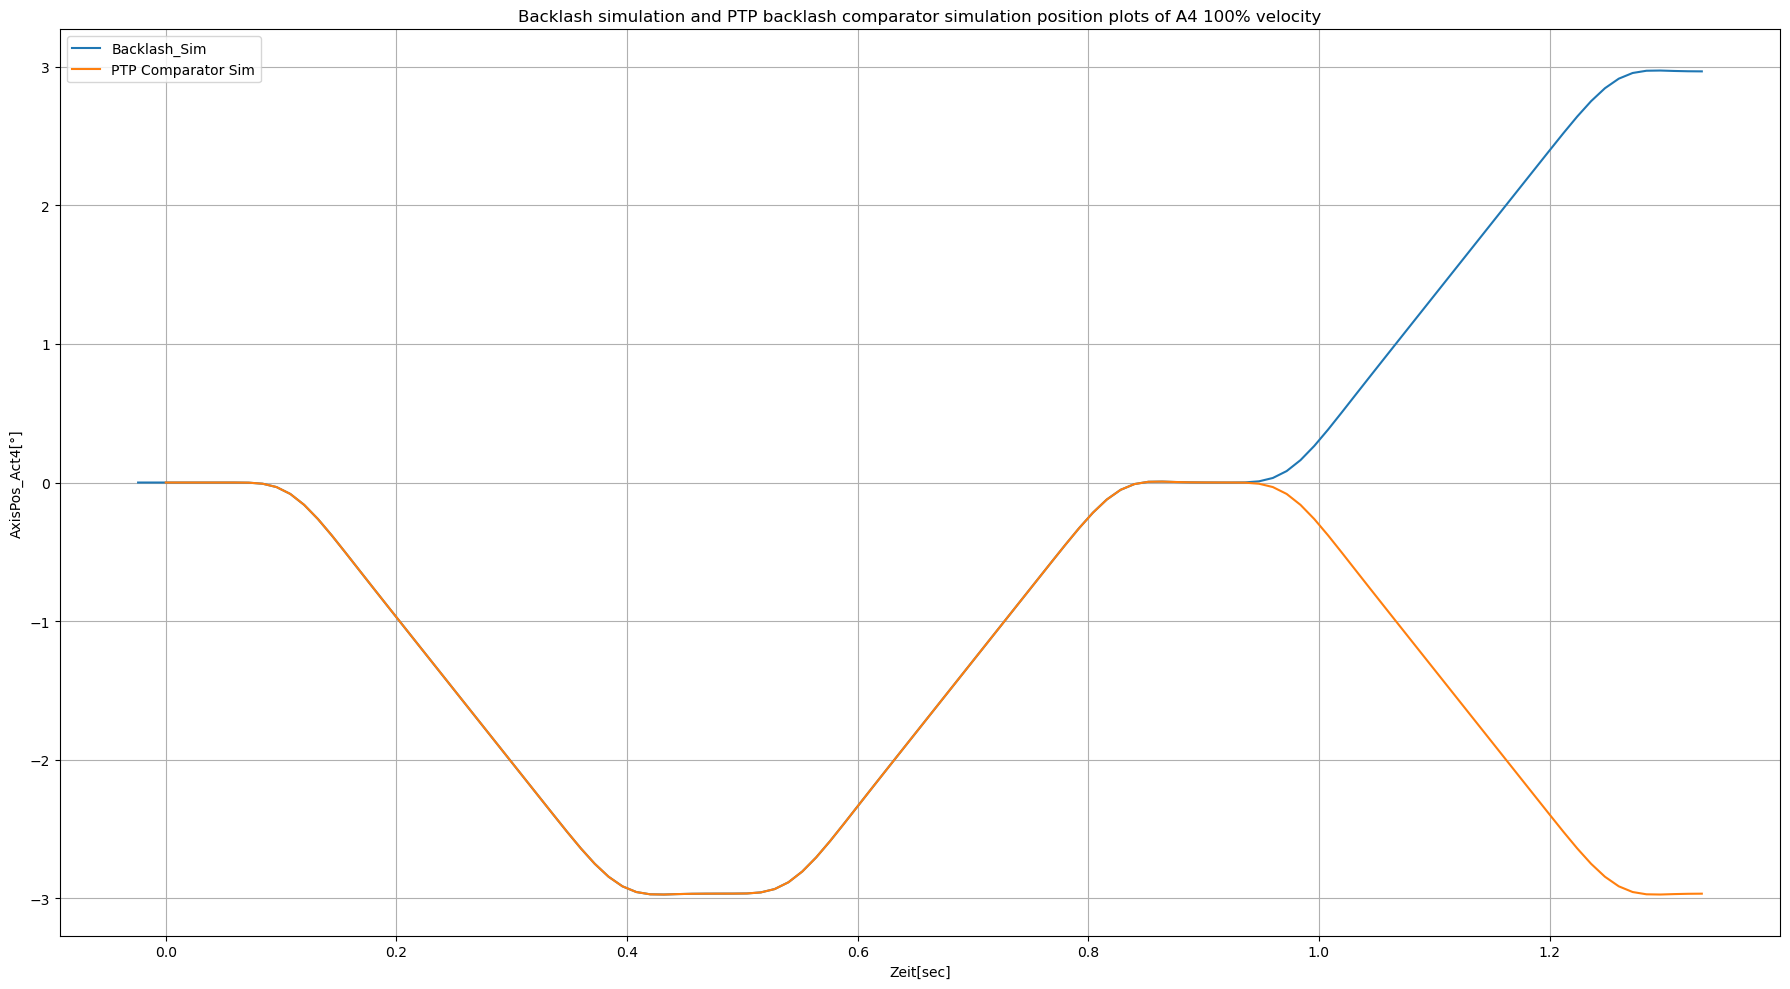

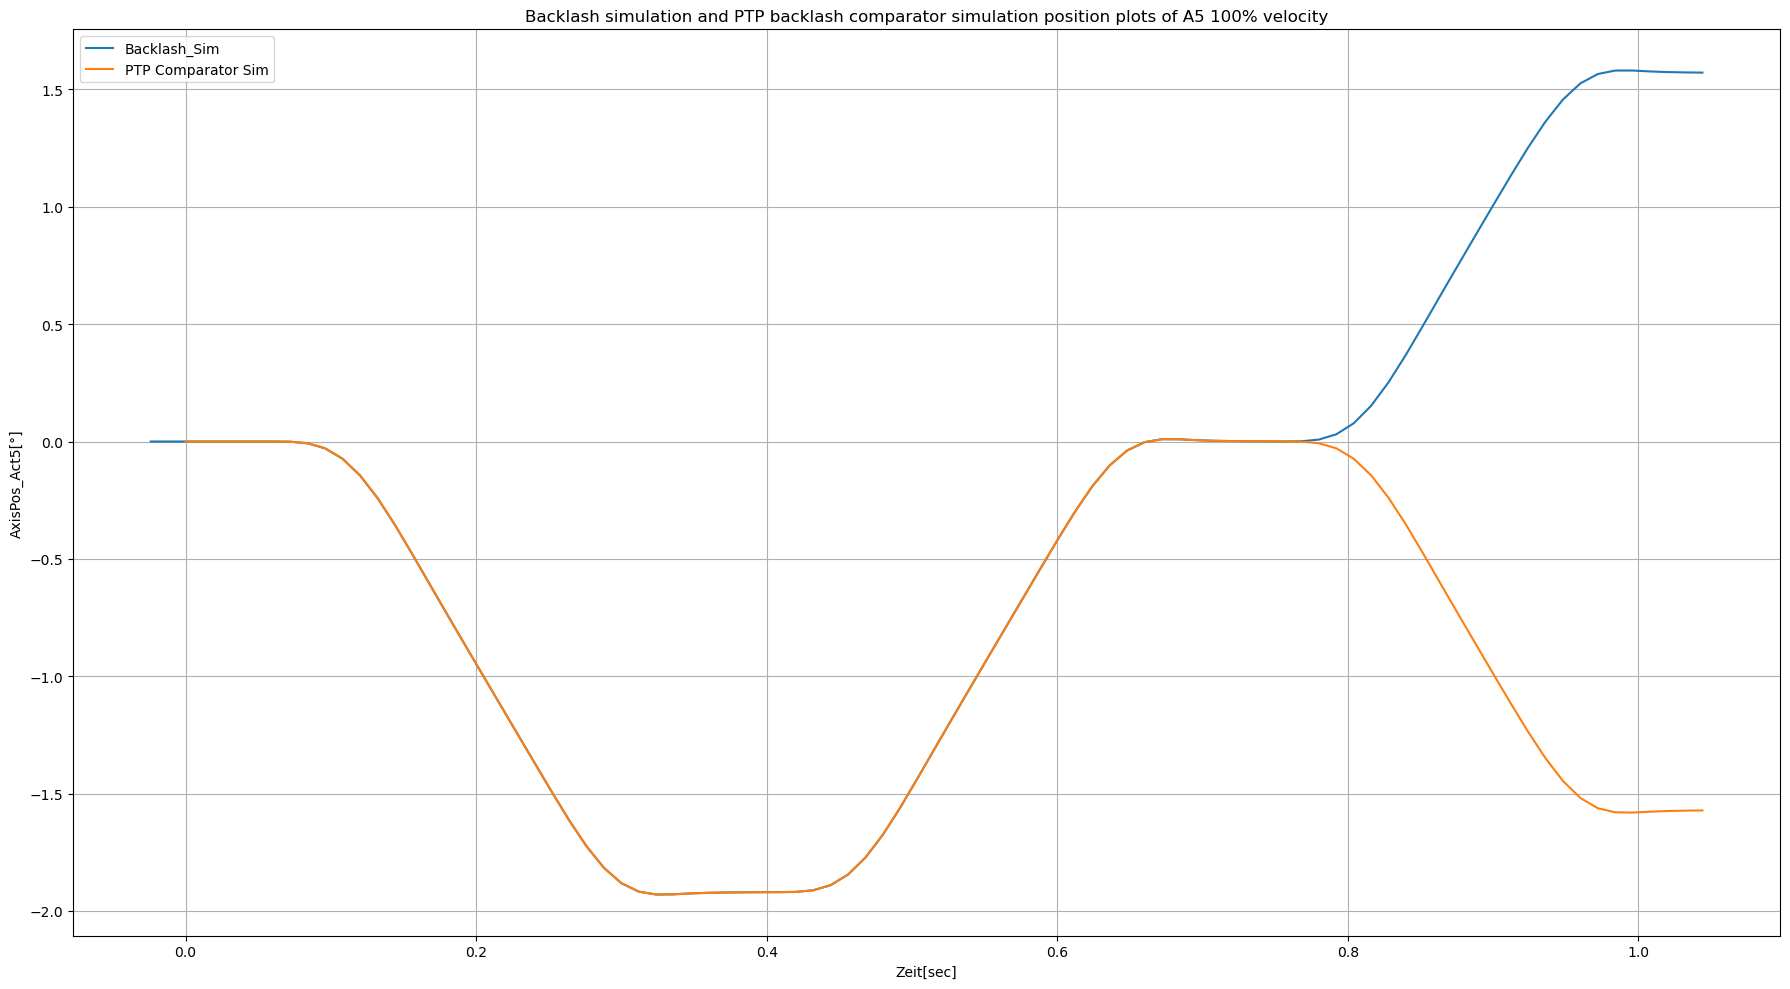

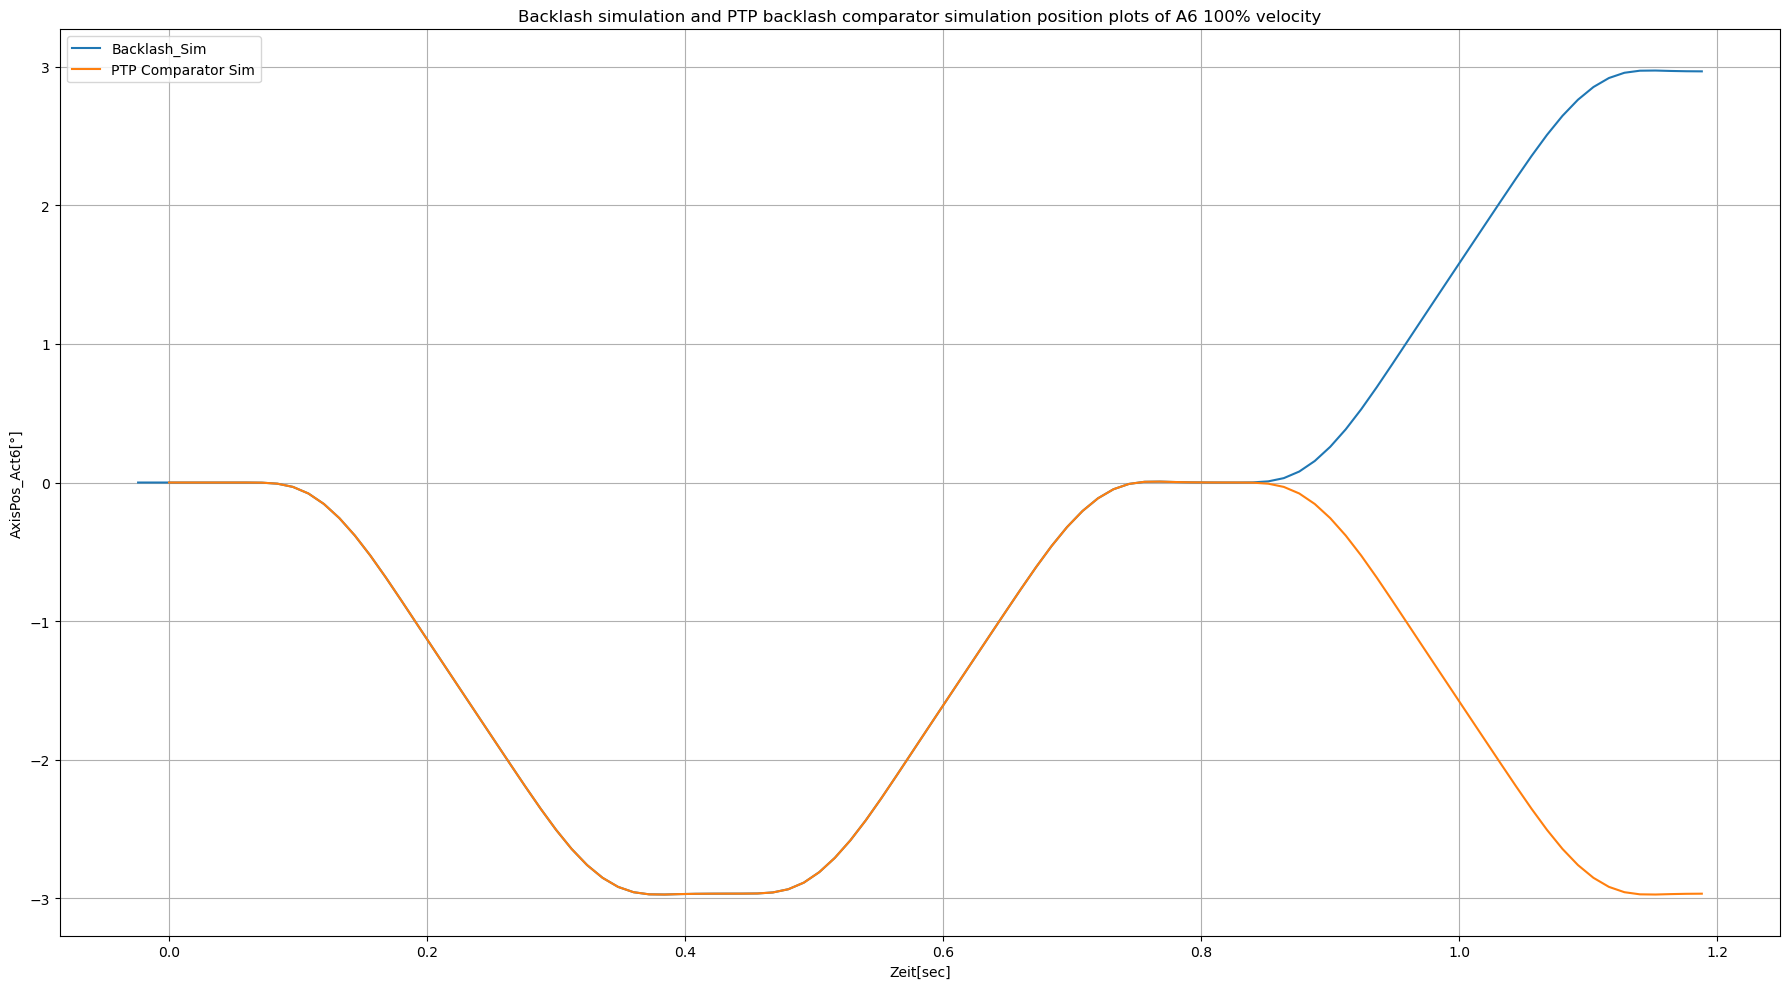

In [52]:
li_Backlash_Sim = []
li_Comparator_Sim = []  

if (len(fileNames_Backlash)==len(fileNames_Comparator_Real)):
    for i in range (len(fileNames_Backlash)):
        df_Backlash_Sim = pd.read_csv(fileNames_Backlash_Sim[i], delimiter= ';', encoding='cp1252')
        df_Comparator_Sim = pd.read_csv(fileNames_Comparator_Sim[i], delimiter= ';', encoding='cp1252')

        li_Backlash_Sim.append(df_Backlash_Sim)
        li_Comparator_Sim.append(df_Comparator_Sim)
        
        pos_col_Backlash_Sim = li_Backlash_Sim[i].columns[i+7]
        pos_col_Comparator_Sim = li_Comparator_Sim[i].columns[i+7]
        
        # Function for time shifting and plotting the trace of backlash sim
        def shift_Backlash_sim(shift):
            time_Shift = li_Backlash_Sim[i]['Zeit[sec]'] - shift            #Shifting the trace of Backlash (forward) real to left
            li_Backlash_Sim[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Backlash_Sim[i]['Zeit[sec]'], li_Backlash_Sim[i][pos_col_Backlash_Sim], label = 'Backlash_Sim')
            time_Shift = li_Backlash_Sim[i]['Zeit[sec]'] + shift            #Shifting the trace back to original position for next iteration
            li_Backlash_Sim[i]['Zeit[sec]'] = time_Shift
        
        #########################################################################################################################
        # Backlash simulation and PTP comparator simulation plots
        plt.figure(num=2, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==0 or i==2):
            shift_Backlash_sim(0.012)
        elif (i==1):
            shift_Backlash_sim(0.036)

        elif (i==3 or i==4 or i==5):
            shift_Backlash_sim(0.024)
        else:
            shift_Backlash(0)

        plt.plot(li_Comparator_Sim[i]['Zeit[sec]'], li_Comparator_Sim[i][pos_col_Comparator_Sim], label = 'PTP Comparator Sim')
        plt.legend()
        plt.grid()
        plt.xlabel(li_Comparator_Sim[i].columns[0])
        plt.ylabel(li_Comparator_Sim[i].columns[i+7])
        plt.title('Backlash simulation and PTP backlash comparator simulation position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Backlash_Comparator_Sim'):
            os.makedirs('Images/Backlash_Comparator_Sim')
        plt.savefig('Images/Backlash_Comparator_Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()



Axis position plots of comparator (Reverse) for Real robot and Simulation

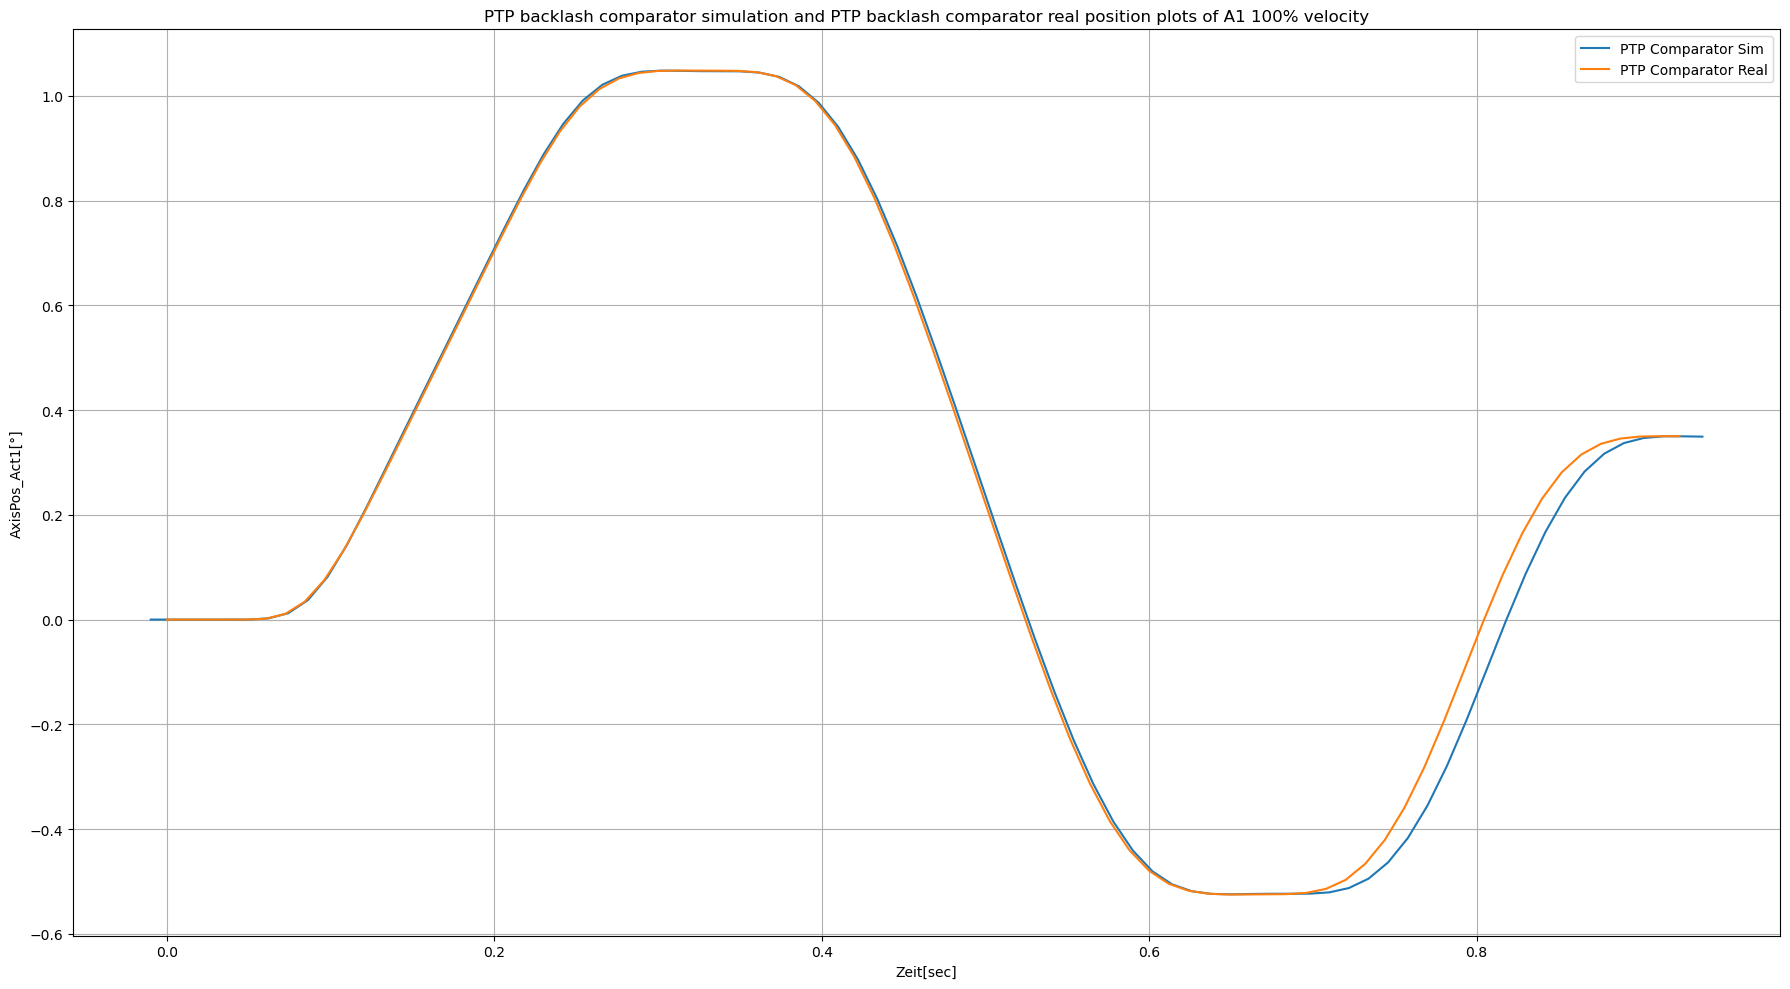

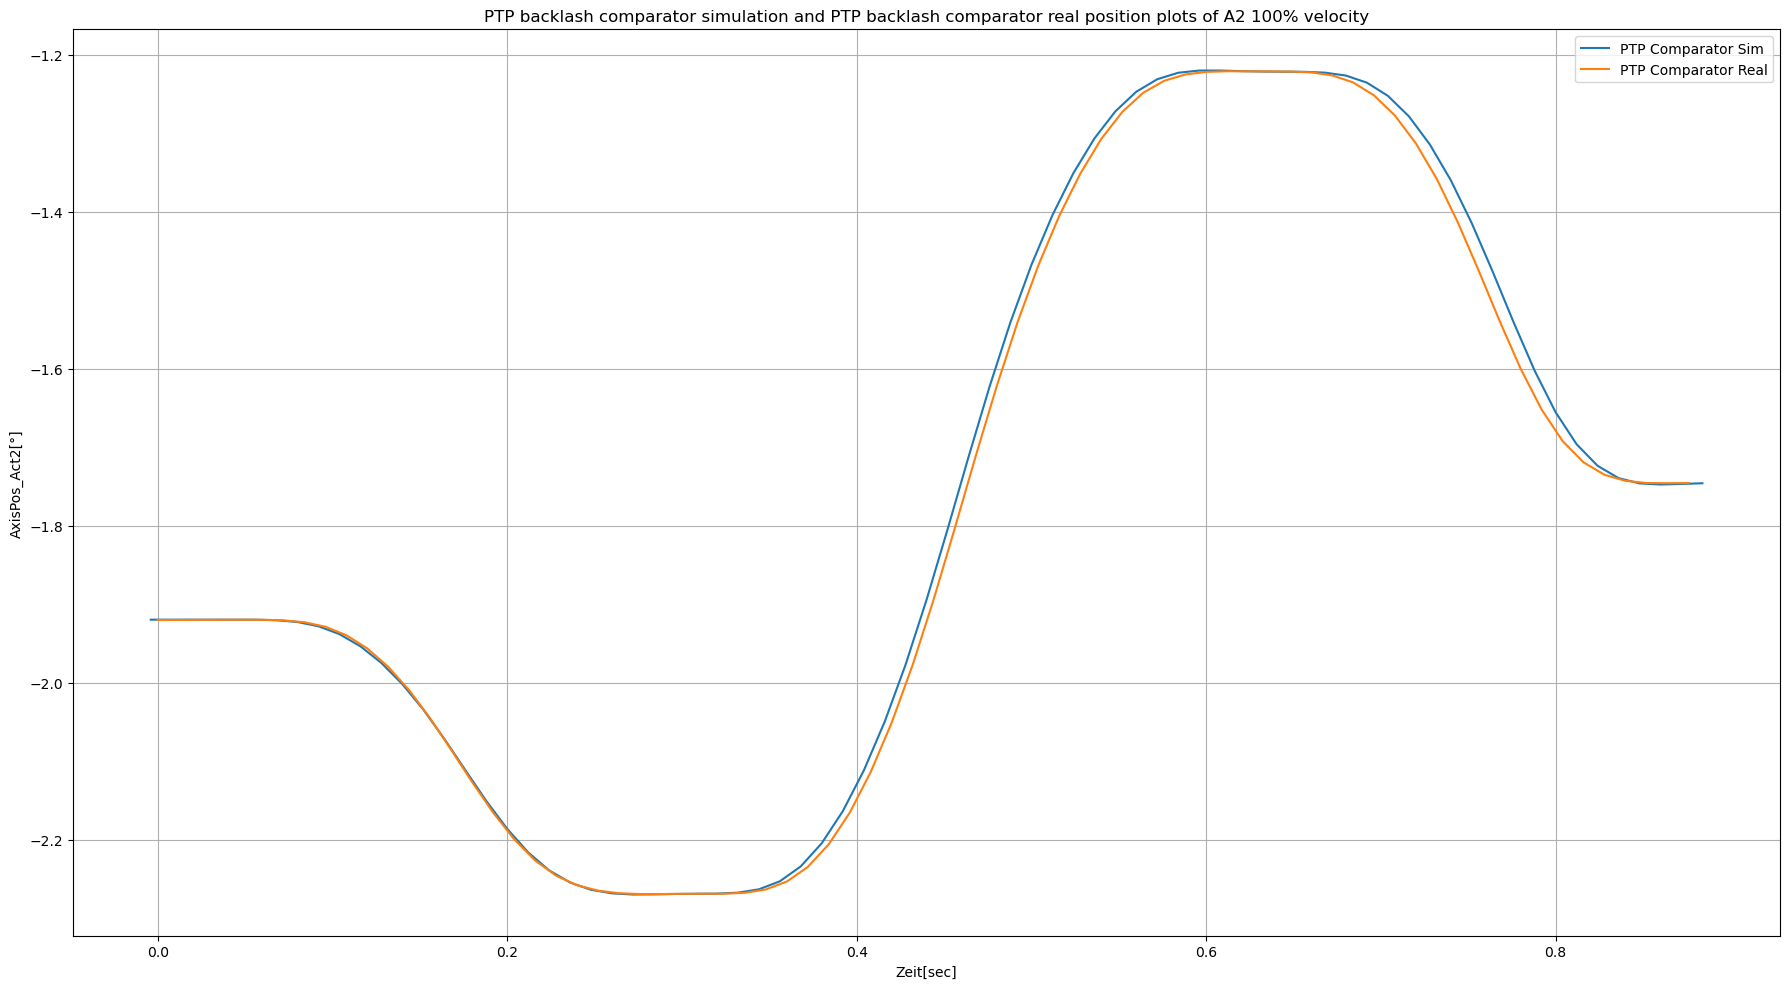

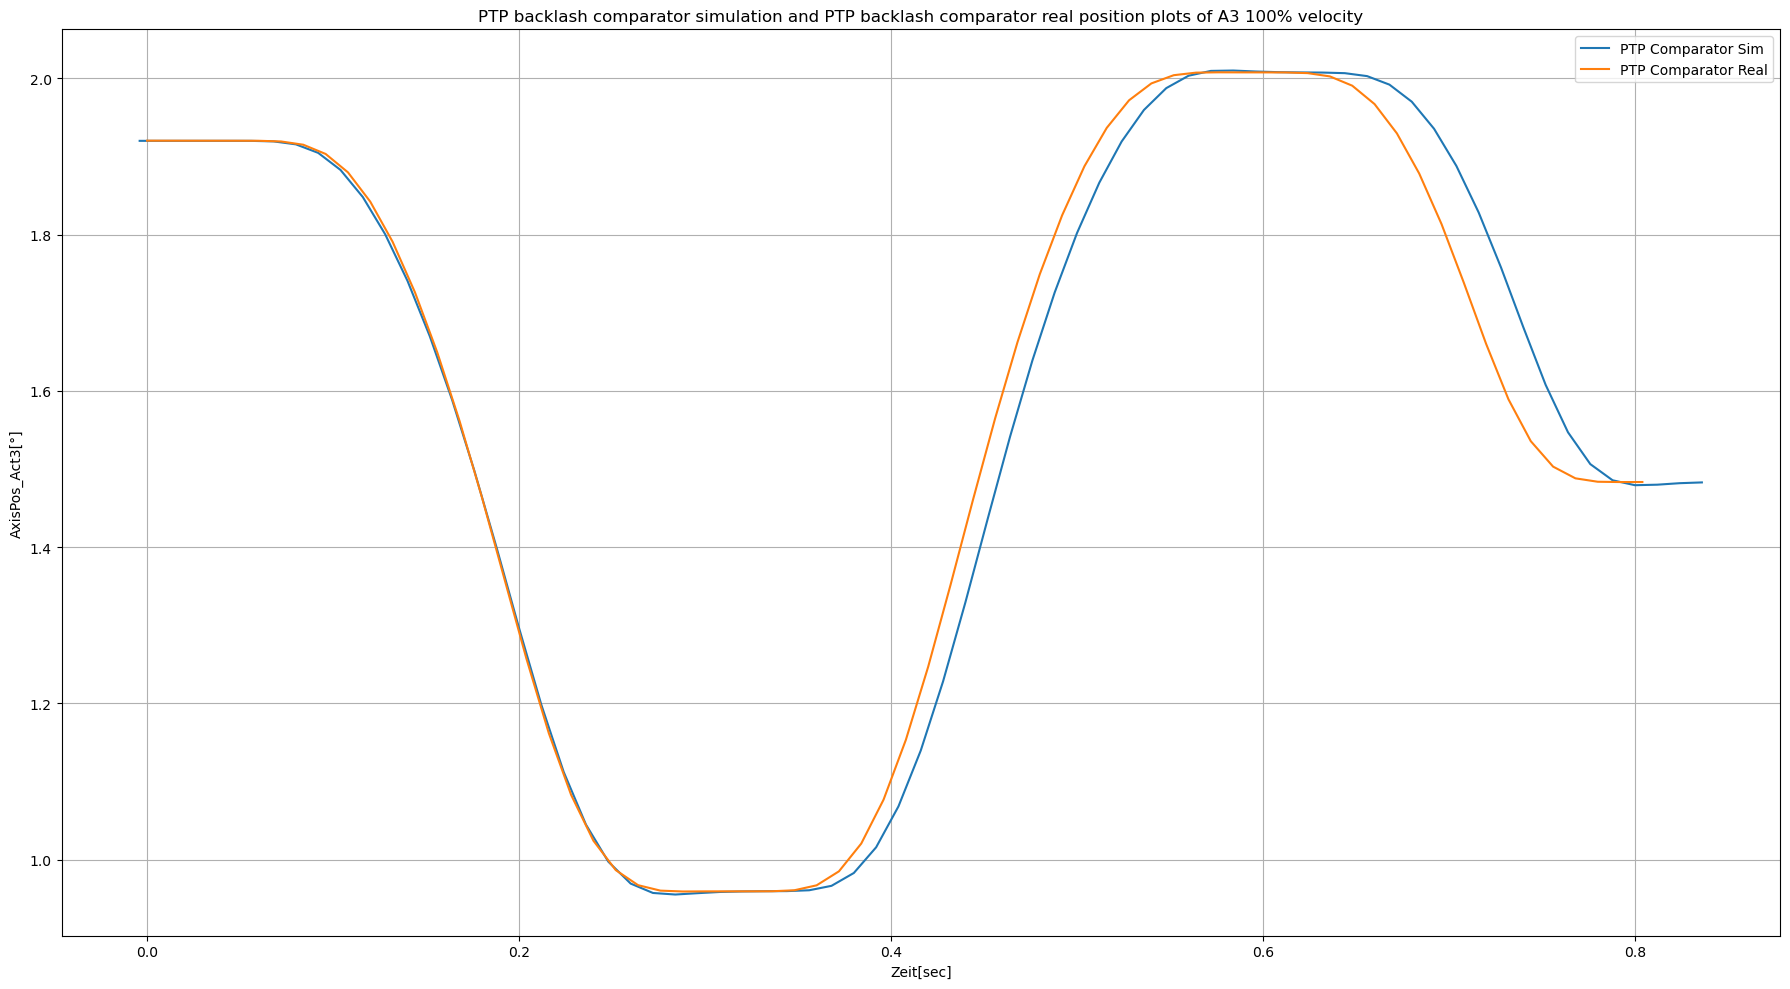

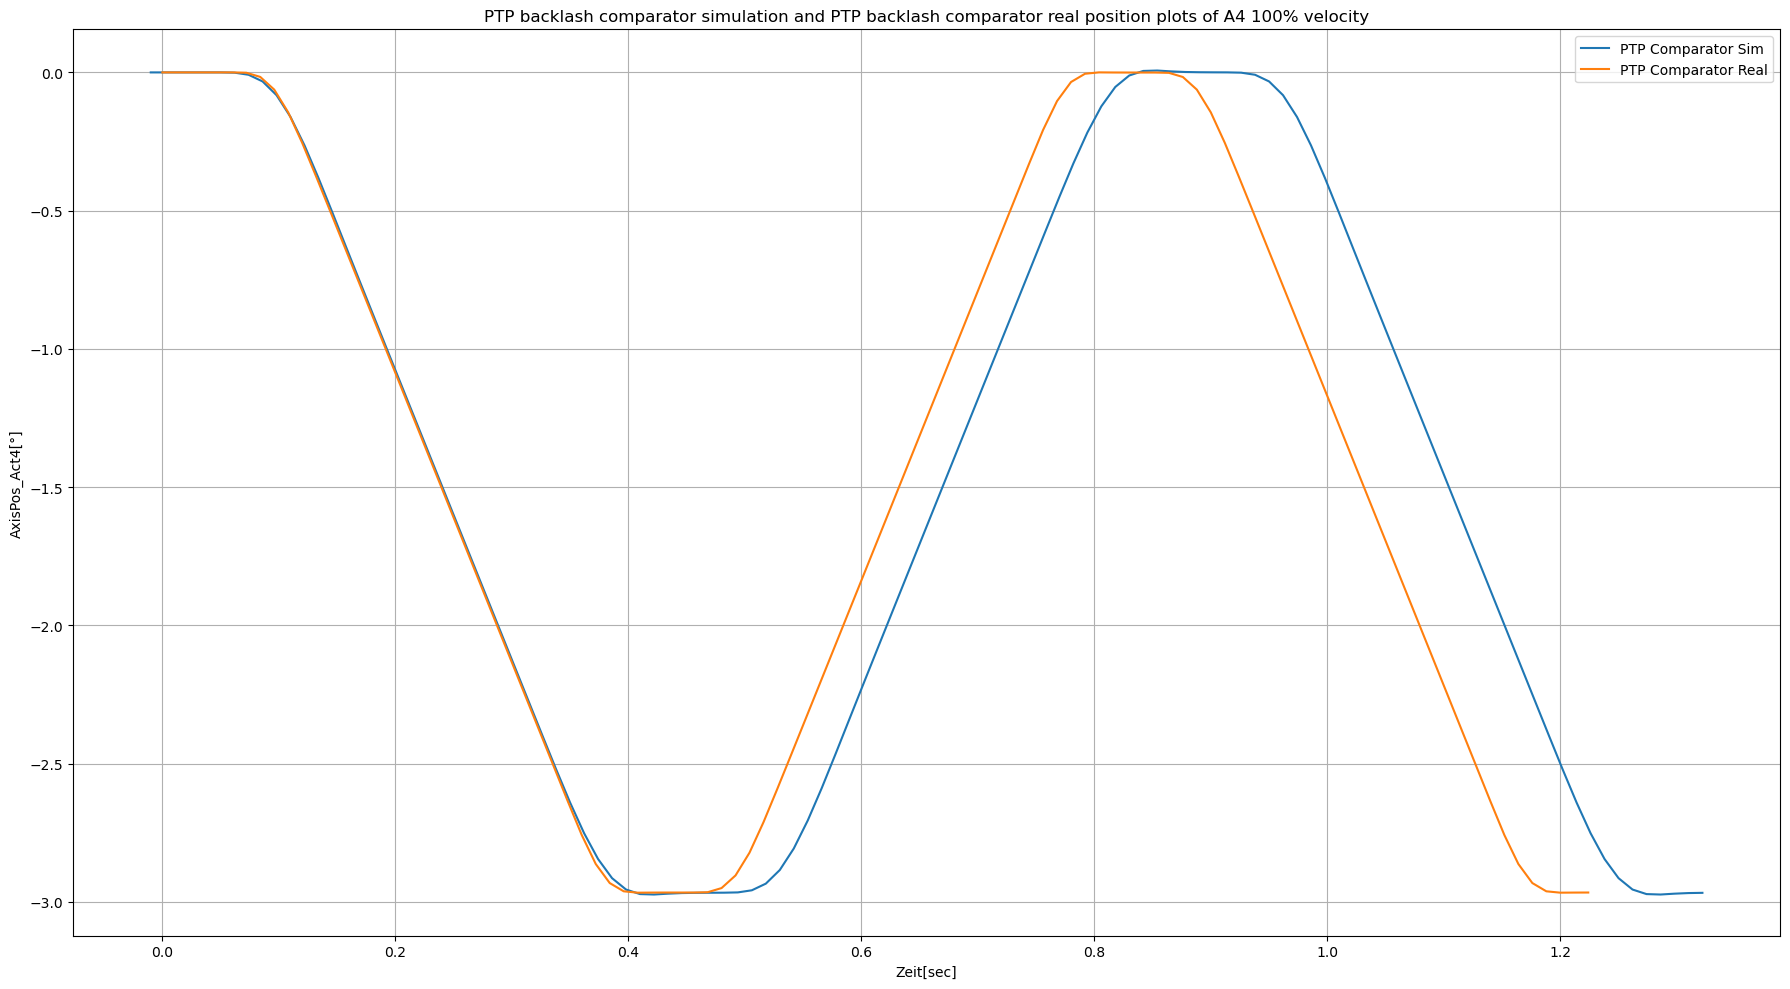

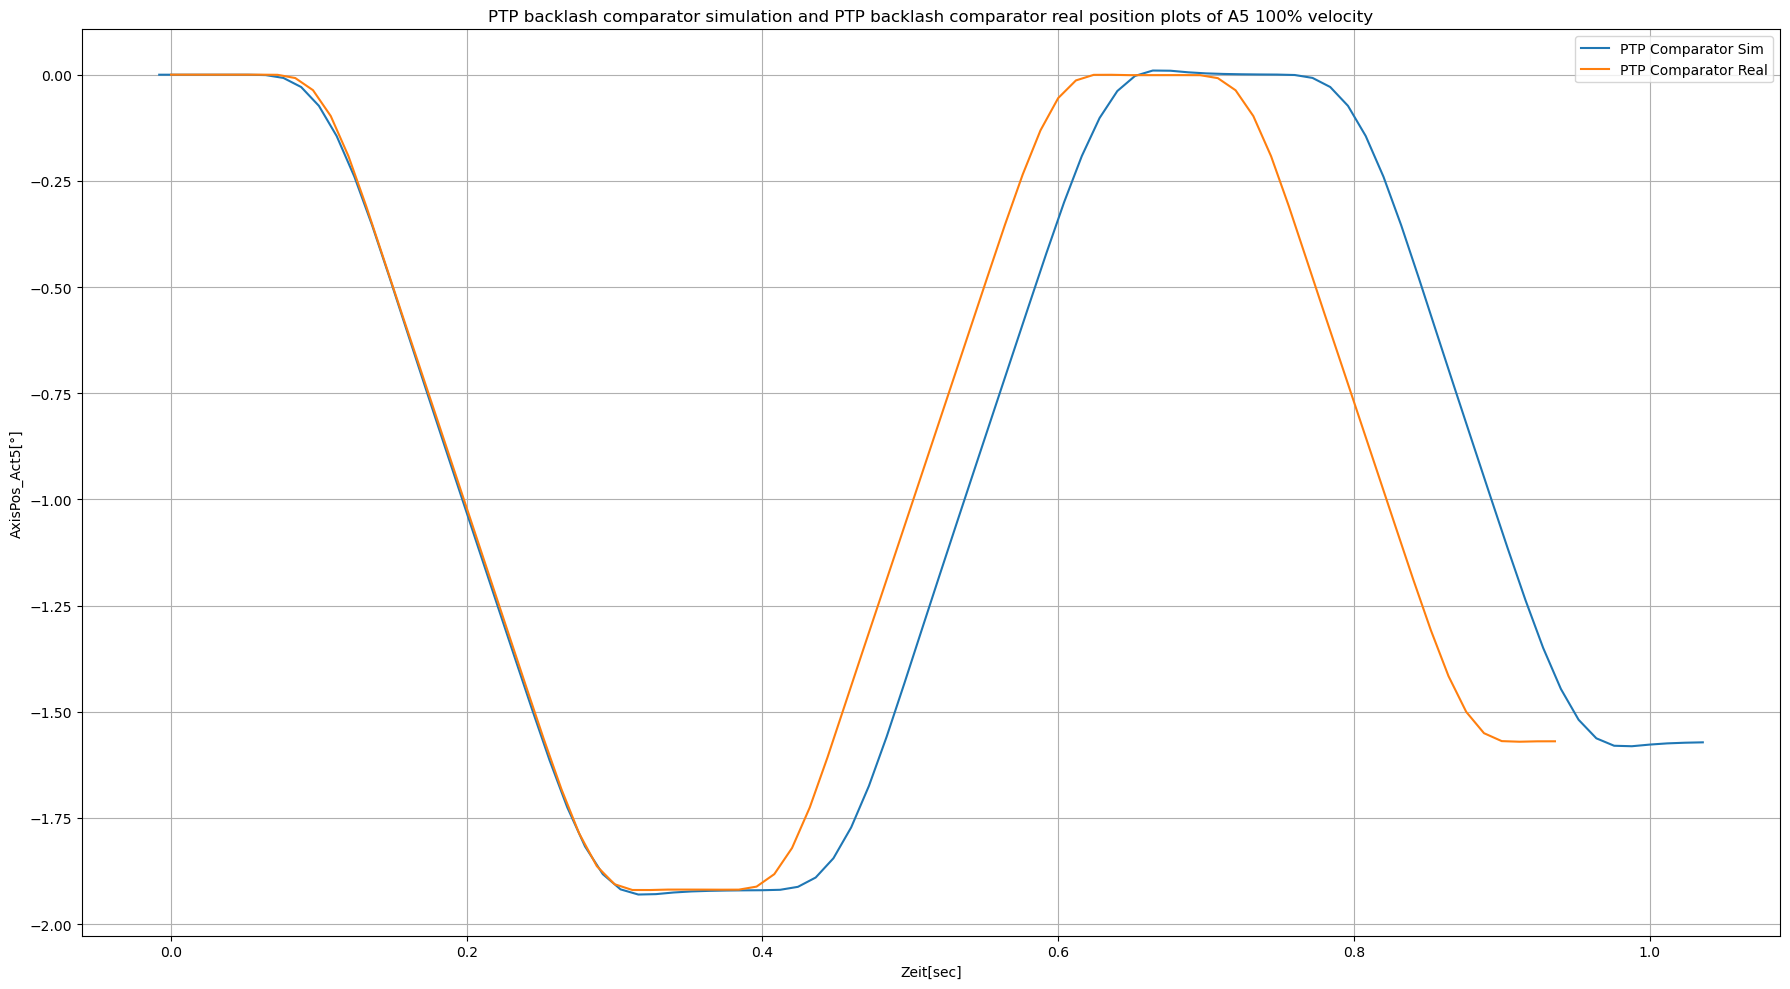

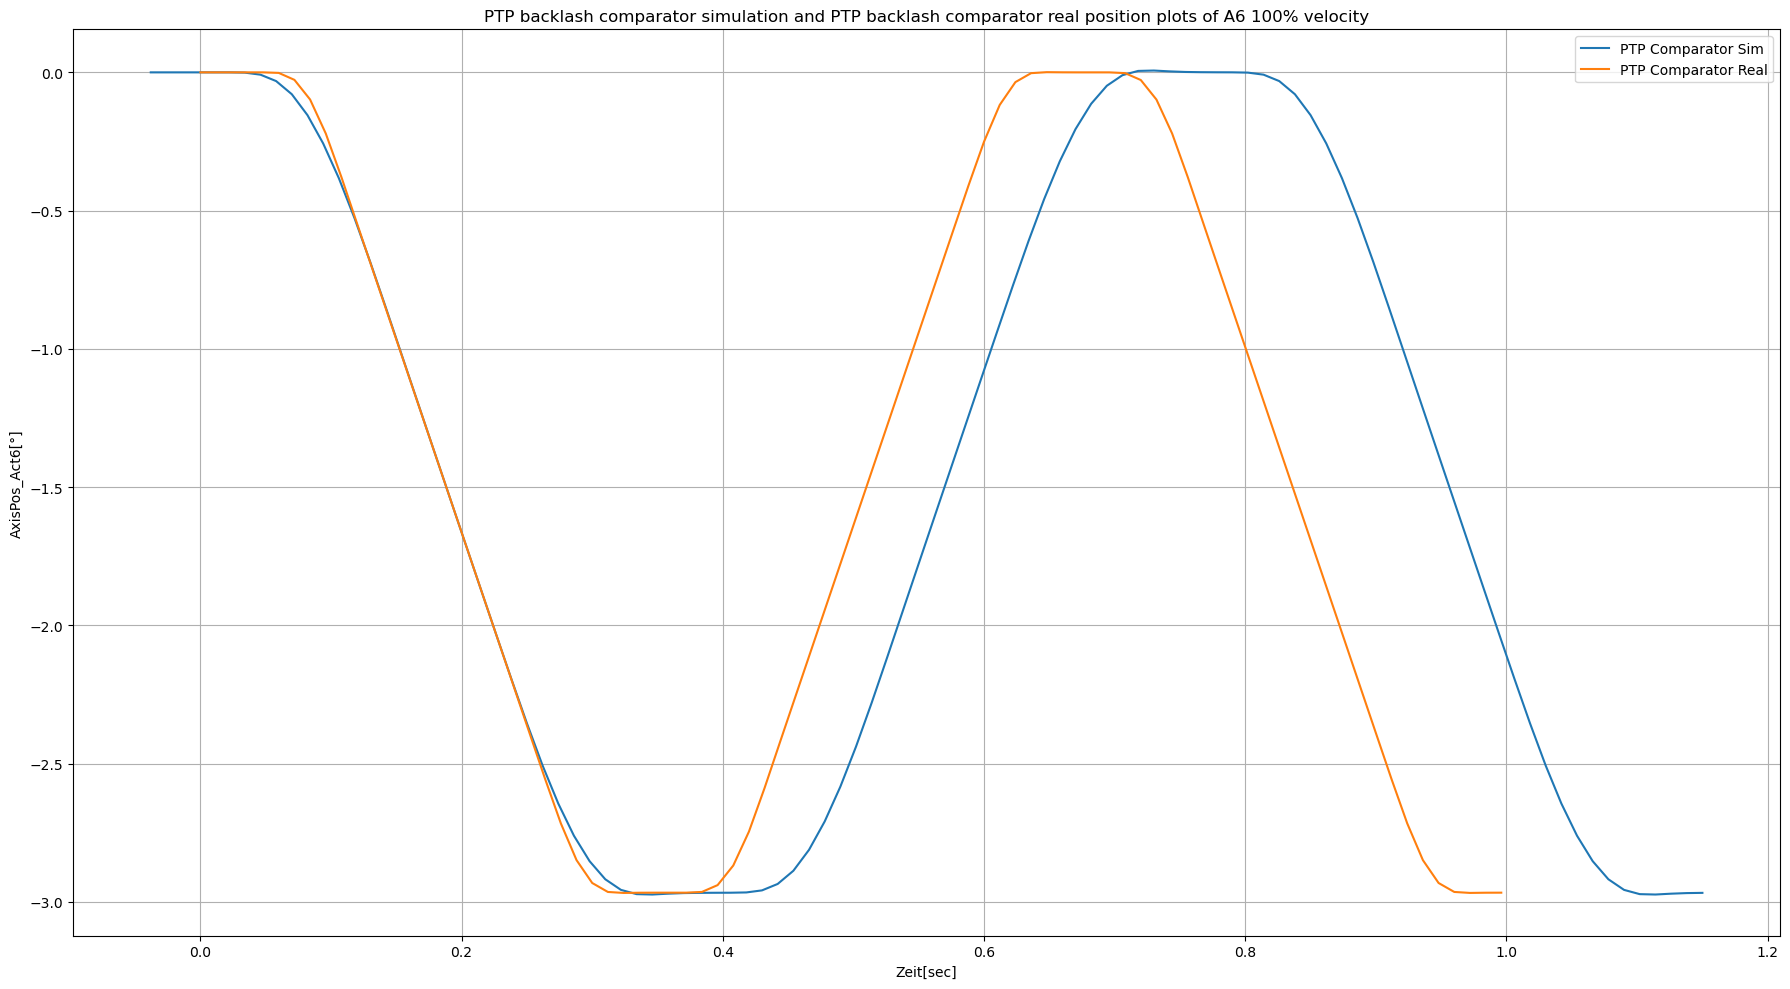

In [53]:
li_Comparator_Real = []
li_Comparator_Sim = []

if (len(fileNames_Comparator_Sim)==len(fileNames_Comparator_Real)):
    for i in range (len(fileNames_Comparator_Real)):
        df_Comparator_Sim = pd.read_csv(fileNames_Comparator_Sim[i], delimiter=';', encoding='cp1252')
        df_Comparator_Real = pd.read_csv(fileNames_Comparator_Real[i], delimiter=';', encoding='cp1252')  

        li_Comparator_Sim.append(df_Comparator_Sim)
        li_Comparator_Real.append(df_Comparator_Real)

        pos_col_Comparator_Sim = li_Comparator_Sim[i].columns[i+7]
        pos_col_Comparator_Real = li_Comparator_Real[i].columns[i+7]

        # Function for time shifting and plotting the PTP comparator simulation trace
        def shift_Sim(shift):
            time_Shift = li_Comparator_Sim[i]['Zeit[sec]'] + shift          #Shifting the trace if PTP comparator sim to right
            li_Comparator_Sim[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Comparator_Sim[i]['Zeit[sec]'], li_Comparator_Sim[i][pos_col_Comparator_Sim], label = 'PTP Comparator Sim')
            time_Shift = li_Comparator_Sim[i]['Zeit[sec]'] - shift          #Shifting the trace back to original position for next iteration
            li_Comparator_Sim[i]['Zeit[sec]'] = time_Shift
        
        ################################################################################################################################
        # PTP comparator real and backlash PTP simulation plots
        plt.figure(num=3, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==0 or i==3):
            shift_Sim(-0.01)

        elif (i==1 or i==2):
            shift_Sim(-0.004)

        elif (i==4):
            shift_Sim(-0.008)

        elif (i==5):
            shift_Sim(-0.038)

        else:
            shift_Sim(0)

        plt.plot(li_Comparator_Real[i]['Zeit[sec]'], li_Comparator_Real[i][pos_col_Comparator_Real], label = 'PTP Comparator Real')
        plt.legend()
        plt.grid()
        plt.xlabel(li_Comparator_Real[i].columns[0])
        plt.ylabel(li_Comparator_Real[i].columns[i+7])
        plt.title('PTP backlash comparator simulation and PTP backlash comparator real position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Comparator_Real_Sim'):
            os.makedirs('Images/Comparator_Real_Sim')
        plt.savefig('Images/Comparator_Real_Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()

       

Axis position plots of Backlash (Forward) for Real robot and Simulation

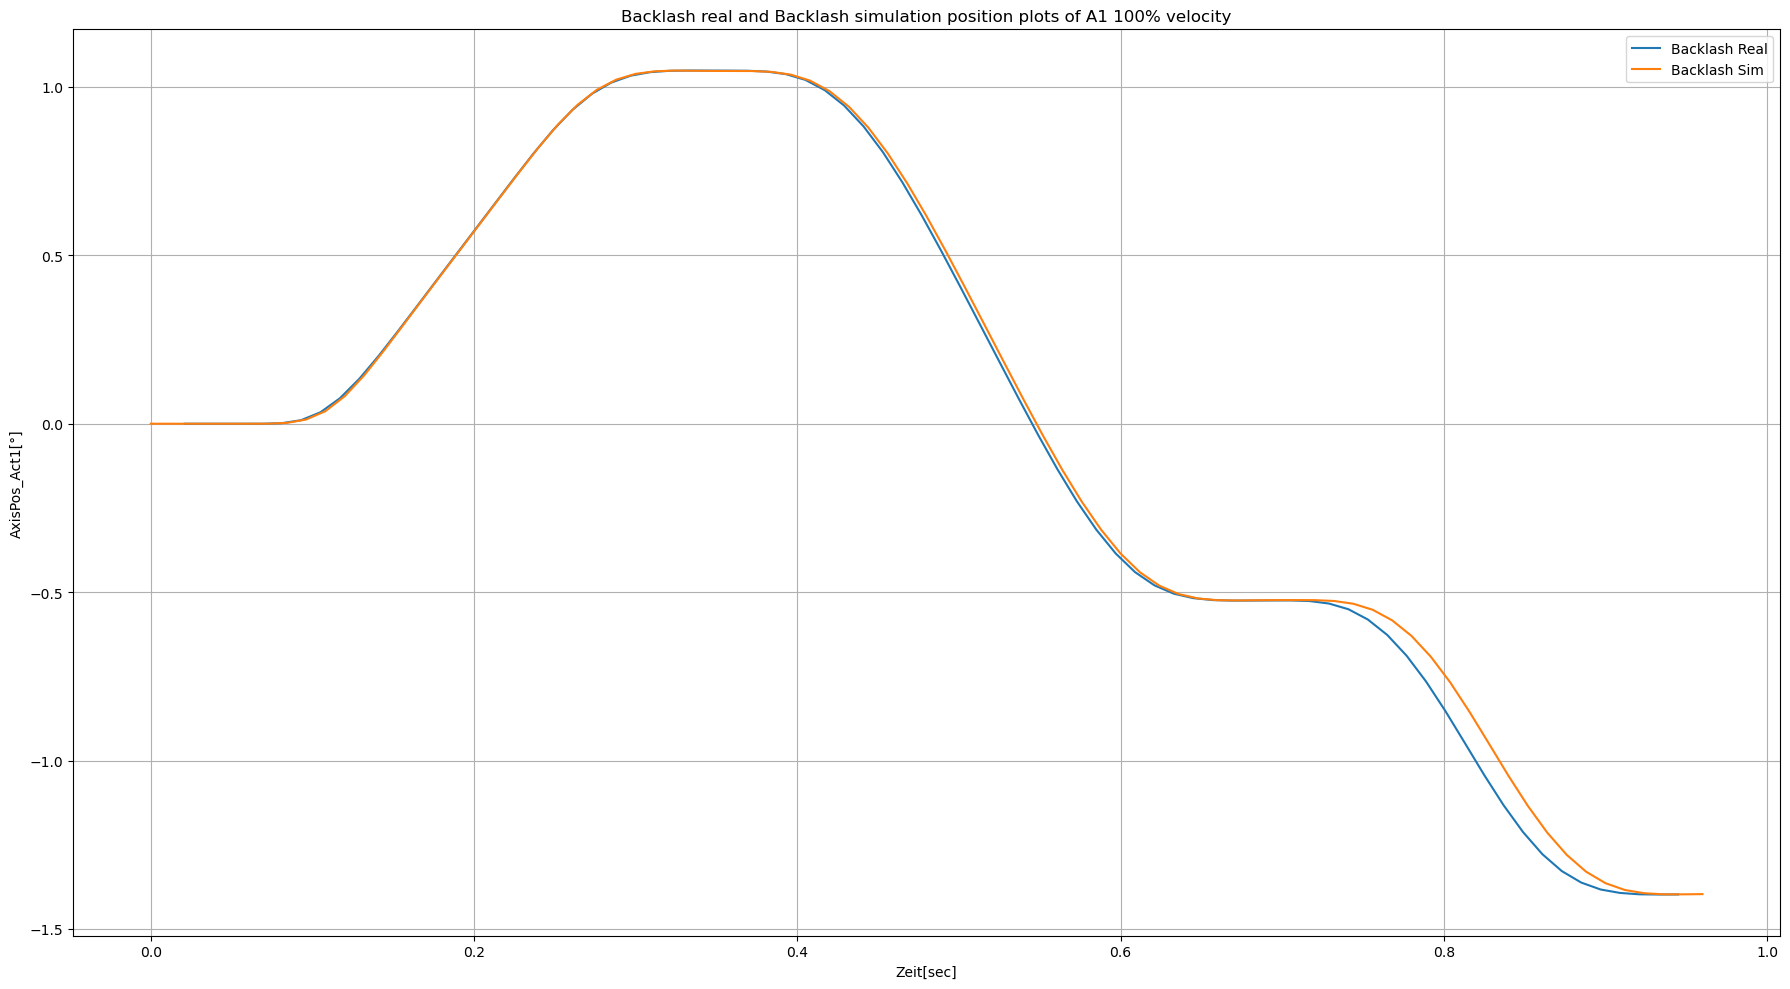

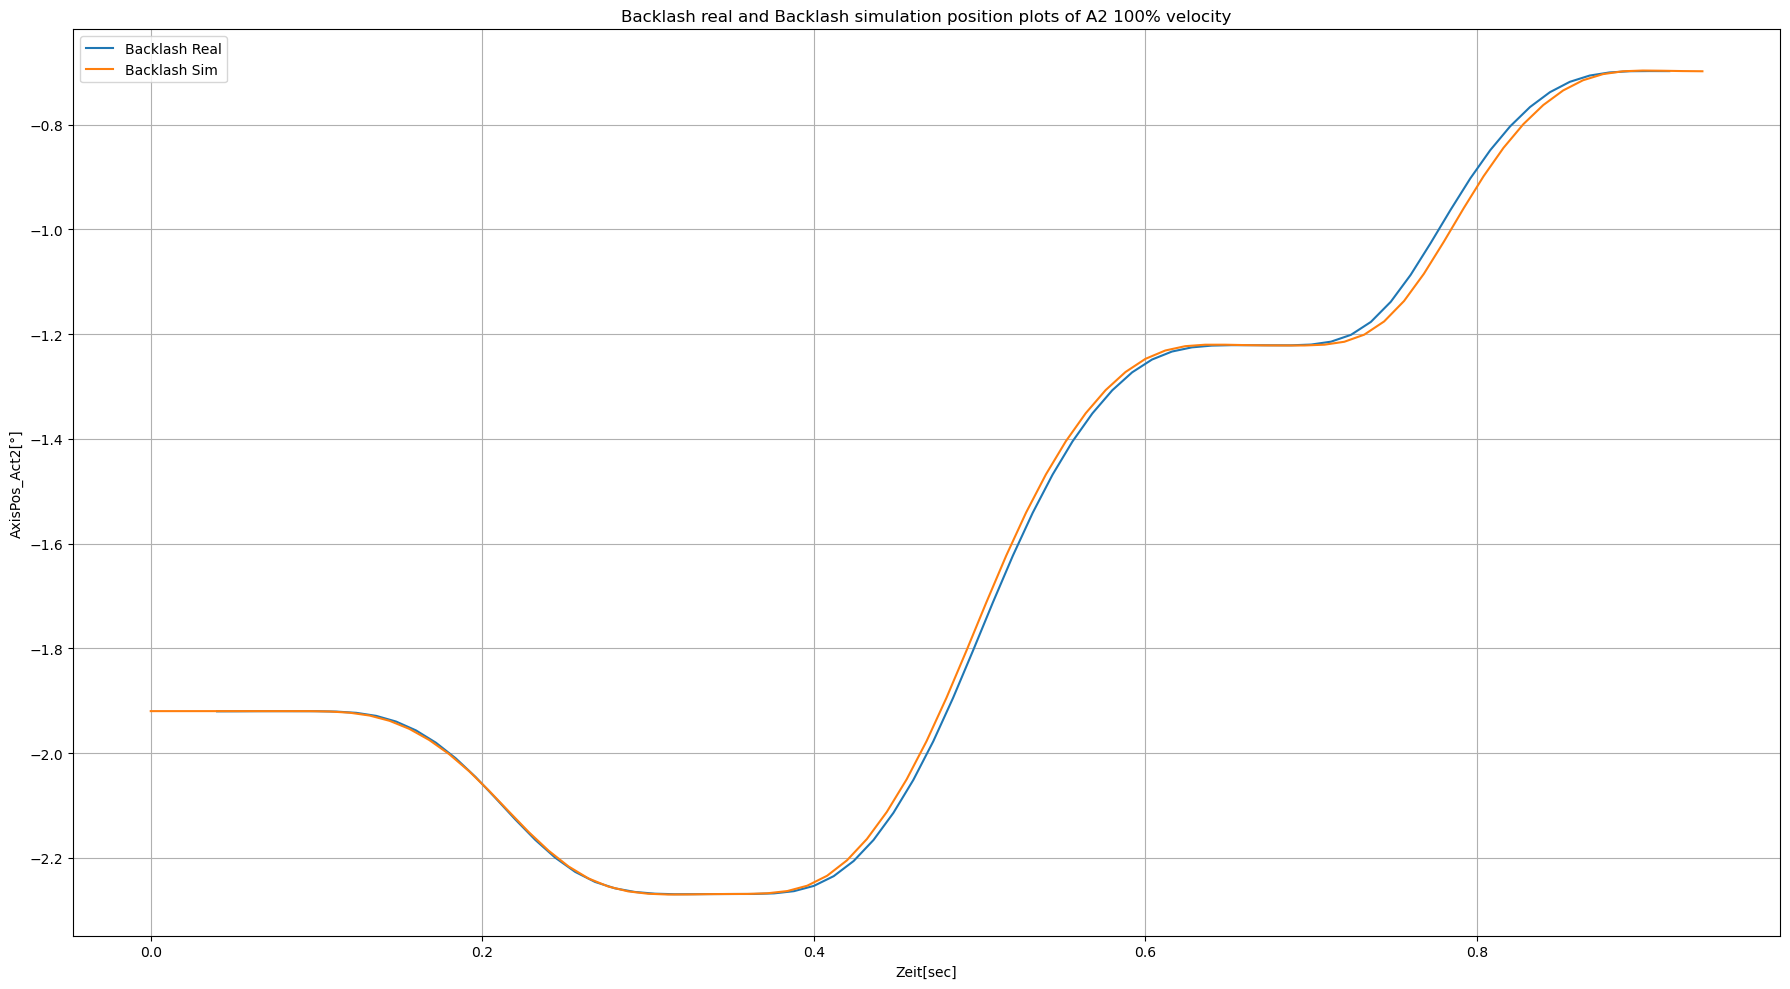

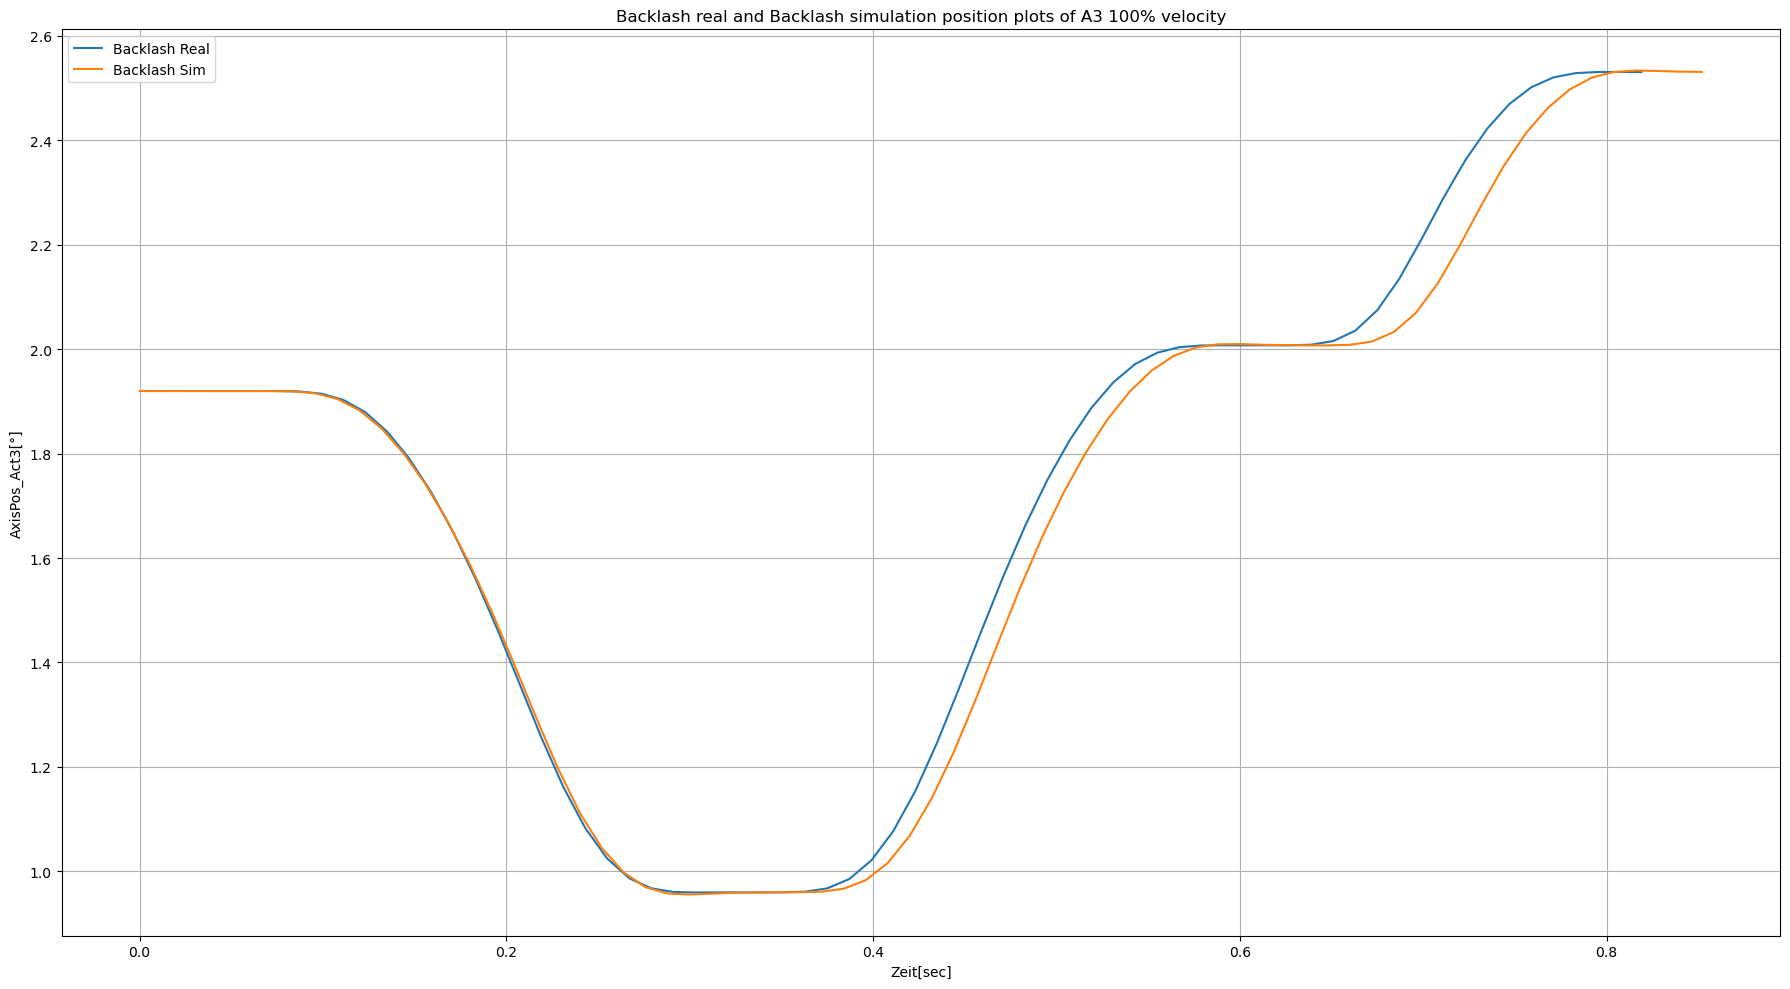

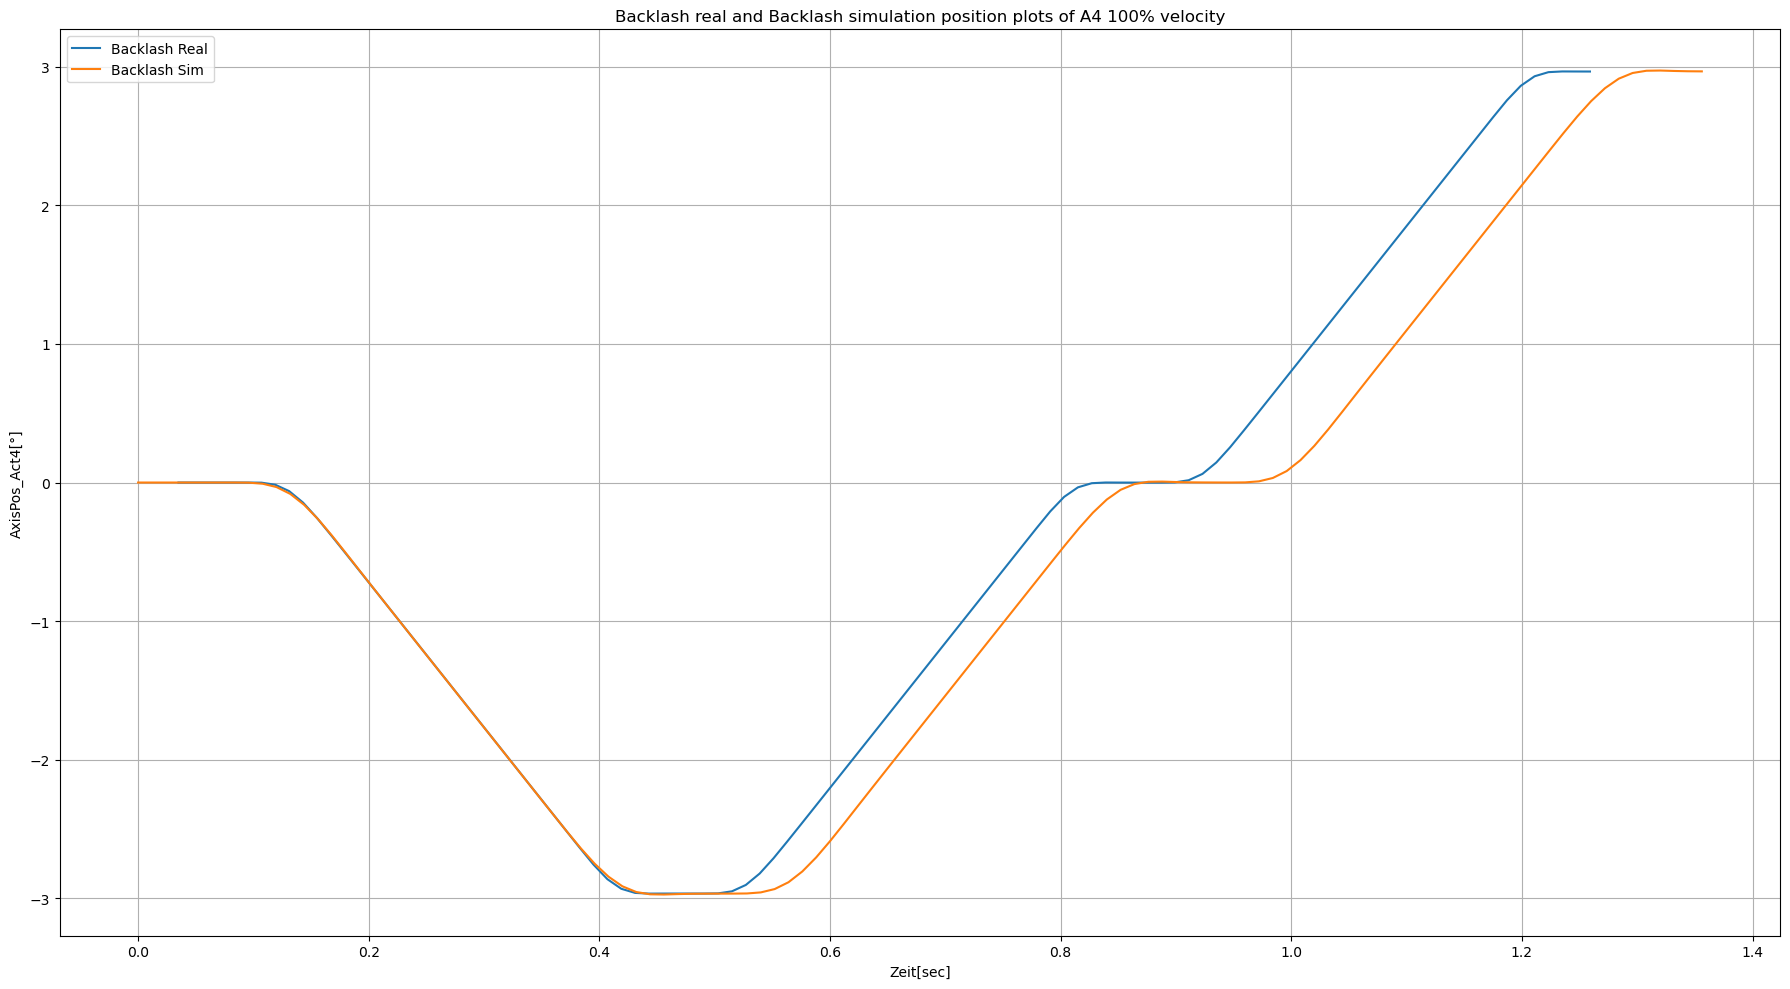

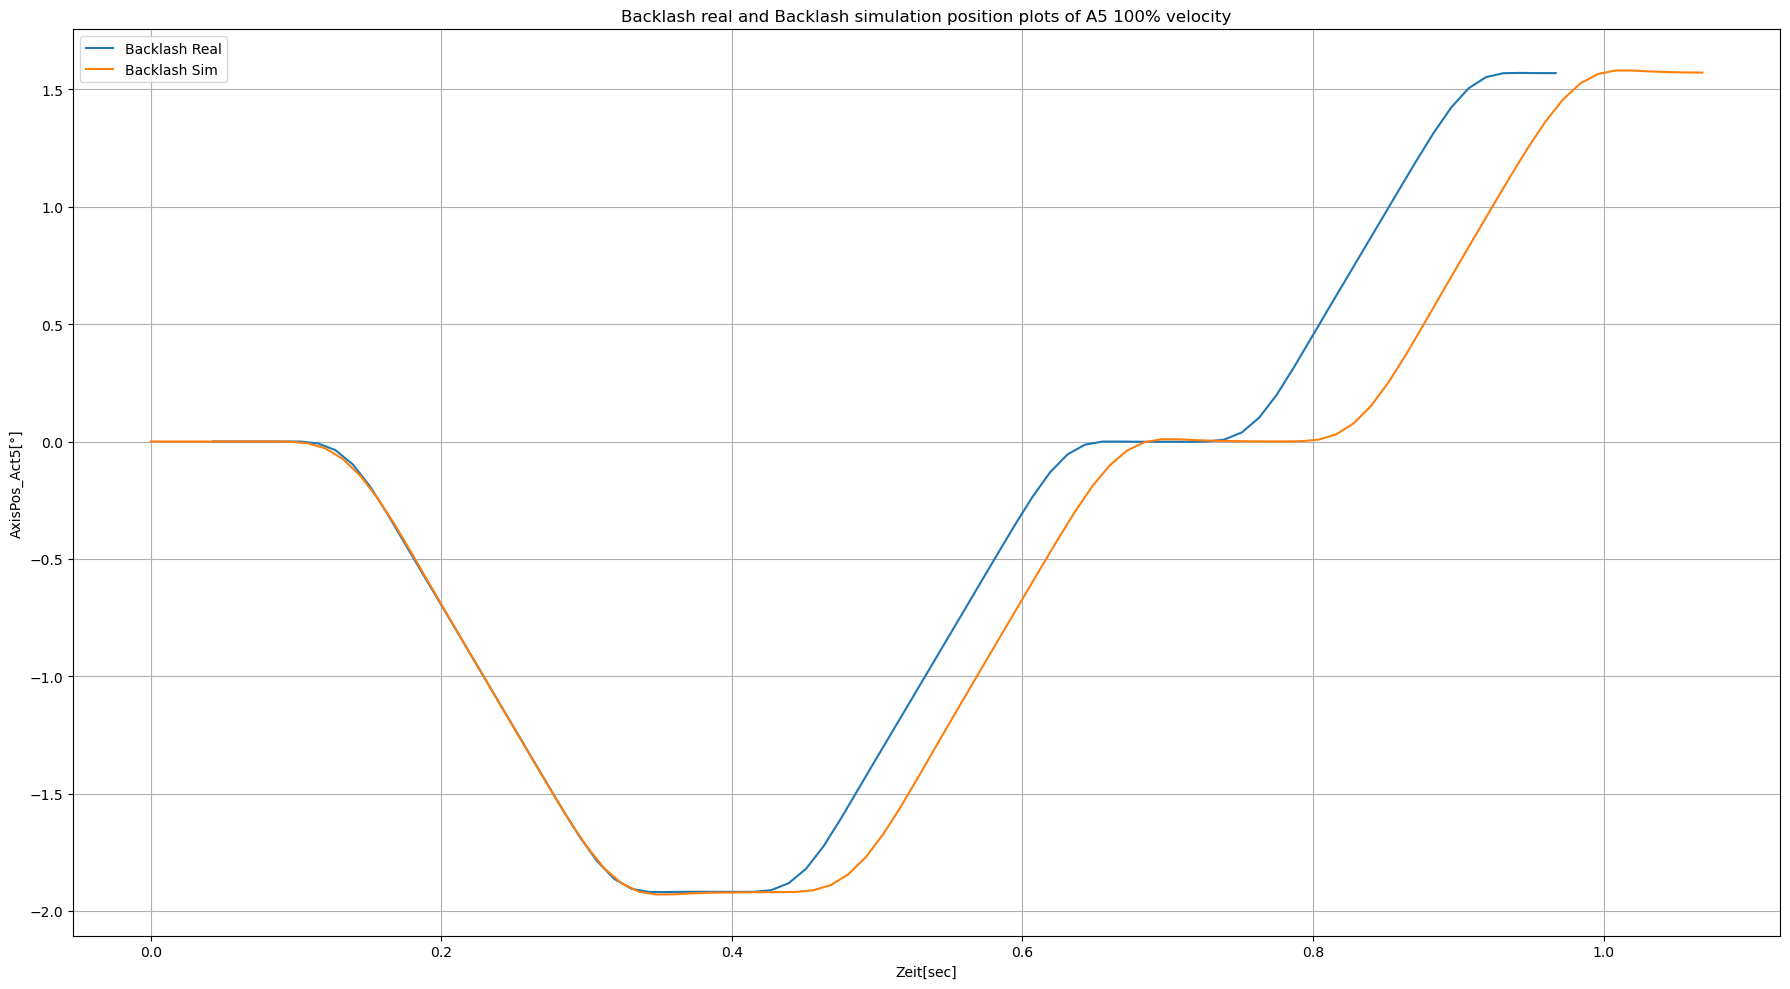

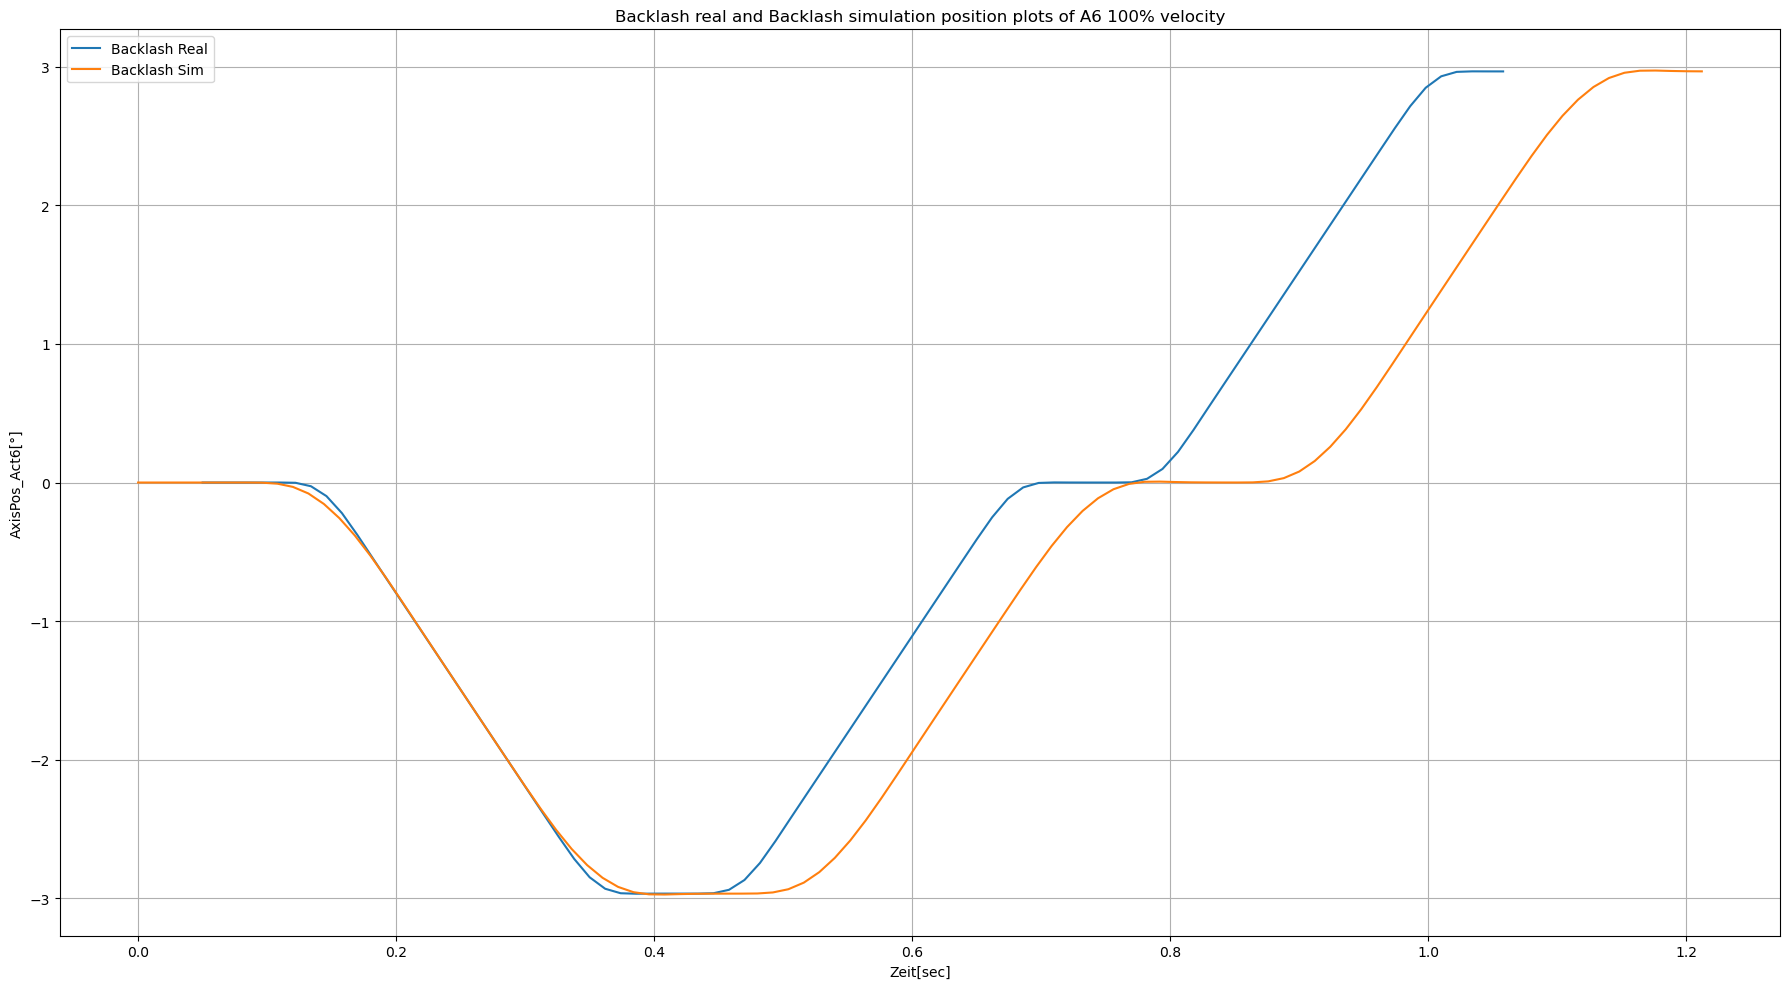

In [54]:
li_Backlash = []
li_Backlash_Sim = []

if (len(fileNames_Backlash)==len(fileNames_Backlash_Sim)):
    for i in range (len(fileNames_Backlash)):
        df_Backlash = pd.read_csv(fileNames_Backlash[i], delimiter=';', encoding='cp1252')
        df_Backlash_Sim = pd.read_csv(fileNames_Backlash_Sim[i], delimiter=';', encoding='cp1252')  

        li_Backlash.append(df_Backlash)
        li_Backlash_Sim.append(df_Backlash_Sim)

        pos_col_Backlash = li_Backlash[i].columns[i+7]
        pos_col_Backlash_Sim = li_Backlash_Sim[i].columns[i+7]

        # Function for time shifting and plotting the trace of backlash real 
        def shift_Backlash(shift):
            time_Shift = li_Backlash[i]['Zeit[sec]'] + shift               #Shifting the trace of Backlash (forward) real to right
            li_Backlash[i]['Zeit[sec]'] = time_Shift
            plt.plot(li_Backlash[i]['Zeit[sec]'], li_Backlash[i][pos_col_Backlash], label = 'Backlash Real')
            time_Shift = li_Backlash[i]['Zeit[sec]'] - shift               #Shifting the trace back to original position for next iteration
            li_Backlash[i]['Zeit[sec]'] = time_Shift

        ##########################################################################################################################
        # Backlash real and backlash comparator real plots    
        plt.figure(num=1, figsize=(18,10), dpi=100, tight_layout=True)

        if (i==0):
            shift_Backlash(0.021)

        elif (i==1):
            shift_Backlash(0.04)

        elif (i==2):
            shift_Backlash(0.015)

        elif (i==3):
            shift_Backlash(0.035)

        elif (i==4):
            shift_Backlash(0.043) 

        elif (i==5):
            shift_Backlash(0.05)

        else:
            shift_Backlash(0)

        plt.plot(li_Backlash_Sim[i]['Zeit[sec]'], li_Backlash_Sim[i][pos_col_Backlash_Sim], label = 'Backlash Sim')
        plt.legend()
        plt.grid()
        plt.xlabel(li_Backlash[i].columns[0])
        plt.ylabel(li_Backlash[i].columns[i+7])
        plt.title('Backlash real and Backlash simulation position plots of A' + str(i+1) +' 100% velocity')
        if not os.path.exists('Images/Backlash_Real_Sim'):
            os.makedirs('Images/Backlash_Real_Sim')
        plt.savefig('Images/Backlash_Real_Sim/A' + str(i+1) + '.jpg')
        plt.show()
        plt.close()
